# Progetto di Machine Learning

## Authors
 - Metelli Claudio
 - Cherubini Mattia
 - Bernocchi Alessandro

## Dataset

Detect smoke with the help of IOT data and trigger a fire alarm, using [Smoke detection](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset) dataset.

# Imports

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Loading Dataset

Come prima cosa importiamo il dataset e stampiamo alcune righe; analizziamo poi il dataset, notando i tipi di ogni colonna ed alcune informazioni ad essa relative. 

In [2]:
dataset = pd.read_csv("smoke_detection_iot.csv")
dataset.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,62630.0,3.131450e+04,18079.868017,0.000000e+00,1.565725e+04,3.131450e+04,4.697175e+04,6.262900e+04
UTC,62630.0,1.654792e+09,110002.488078,1.654712e+09,1.654743e+09,1.654762e+09,1.654778e+09,1.655130e+09
Temperature[C],62630.0,1.597042e+01,14.359576,-2.201000e+01,1.099425e+01,2.013000e+01,2.540950e+01,5.993000e+01
Humidity[%],62630.0,4.853950e+01,8.865367,1.074000e+01,4.753000e+01,5.015000e+01,5.324000e+01,7.520000e+01
TVOC[ppb],62630.0,1.942058e+03,7811.589055,0.000000e+00,1.300000e+02,9.810000e+02,1.189000e+03,6.000000e+04
eCO2[ppm],62630.0,6.700210e+02,1905.885439,4.000000e+02,4.000000e+02,4.000000e+02,4.380000e+02,6.000000e+04
Raw H2,62630.0,1.294245e+04,272.464305,1.066800e+04,1.283000e+04,1.292400e+04,1.310900e+04,1.380300e+04
Raw Ethanol,62630.0,1.975426e+04,609.513156,1.531700e+04,1.943500e+04,1.950100e+04,2.007800e+04,2.141000e+04
Pressure[hPa],62630.0,9.386276e+02,1.331344,9.308520e+02,9.387000e+02,9.388160e+02,9.394180e+02,9.398610e+02
PM1.0,62630.0,1.005943e+02,922.524245,0.000000e+00,1.280000e+00,1.810000e+00,2.090000e+00,1.433369e+04


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
zeros = dataset["Fire Alarm"].value_counts()[0]
ones = dataset["Fire Alarm"].value_counts()[1]
print(
f"""'Fire Alarm' set as 'not active' rows: {zeros}
'Fire Alarm' set as 'active' rows: {ones}
'Total': {zeros + ones}
'Not Active':{np.round(zeros / (zeros + ones) * 100, 2)}%
'Active': {np.round(ones / (zeros + ones) * 100, 2)}%"""
)

'Fire Alarm' set as 'not active' rows: 17873
'Fire Alarm' set as 'active' rows: 44757
'Total': 62630
'Not Active':28.54%
'Active': 71.46%


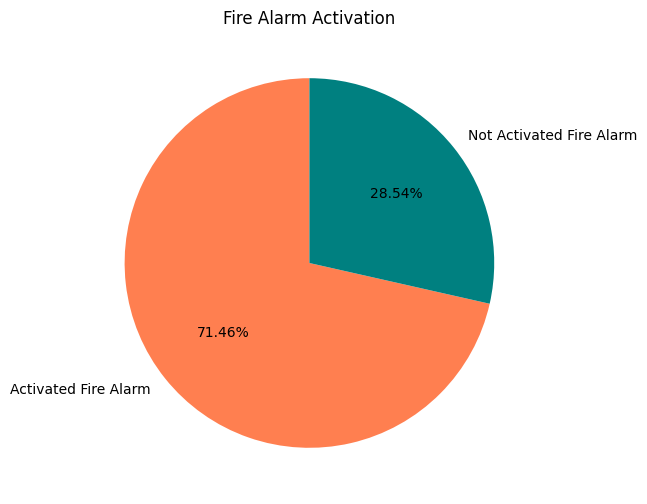

In [6]:
counts = dataset["Fire Alarm"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=["Activated Fire Alarm", "Not Activated Fire Alarm"], autopct='%1.2f%%', startangle=90, colors=["coral", "teal"])
plt.title("Fire Alarm Activation")
plt.show()

# Data Pre-Processing

Innanzittutto rinominiamo la colonna "Unnamed: 0" con il nome "Id", ovvero Id della misurazione rilevata:

In [7]:
dataset = dataset.rename(columns={"Unnamed: 0": "Id"})

Verifichiamo poi la presenza di duplicati:

In [8]:
f"Duplicated values: {dataset.shape[0] - dataset.duplicated().value_counts()[False]}"

'Duplicated values: 0'

Eliminiamo poi colonne non necessarie all'apprendiamento, ovvero la neo-colonna "Id", "UTC", ovvero il timestamp, ed il counter "CNT", salvando una copia per evenyuali utilizzi futuri

In [9]:
old_dataset = dataset.copy()
dataset = dataset.drop(columns=["Id", "UTC", "CNT"])

We try now to understand the data distribution in time:

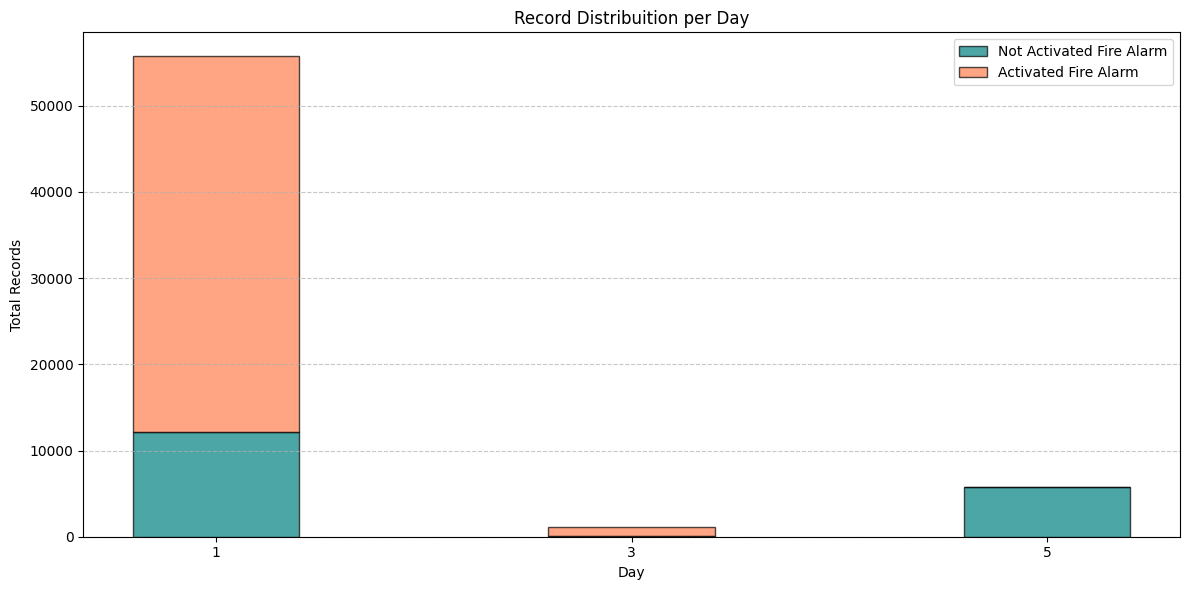

In [10]:
old_dataset["datetime"] = pd.to_datetime(old_dataset["UTC"], unit="s")
old_dataset["day"] = (old_dataset["datetime"] - old_dataset["datetime"].min()).dt.days + 1

day_counts_0 = old_dataset[old_dataset["Fire Alarm"] == 0]["day"].value_counts().sort_index()
day_counts_1 = old_dataset[old_dataset["Fire Alarm"] == 1]["day"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(day_counts_0.index, day_counts_0.values, color="teal", edgecolor="black", alpha=0.7, label="Not Activated Fire Alarm")
plt.bar(day_counts_1.index, day_counts_1.values, color="coral", edgecolor="black", alpha=0.7, label="Activated Fire Alarm", bottom=day_counts_0.values)
plt.xlabel("Day")
plt.ylabel("Total Records")
plt.title("Record Distribuition per Day")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(day_counts_0.index)
plt.legend()
plt.tight_layout()
plt.show()

This time distribution can bring similar data, since they are concentrated in one day (where probably a blaze occurred), but also the data within the day are different (since fire alarm has been activated and not).

## Outliers

Ora vediamo la distribuzione, attraverso istogramma, dei valori per ogni feature del dataset, escludendo "Fire Alarm".<br>Attraverso una visualizzazione grafica cerchiamo la eventuale presenza di outliers:

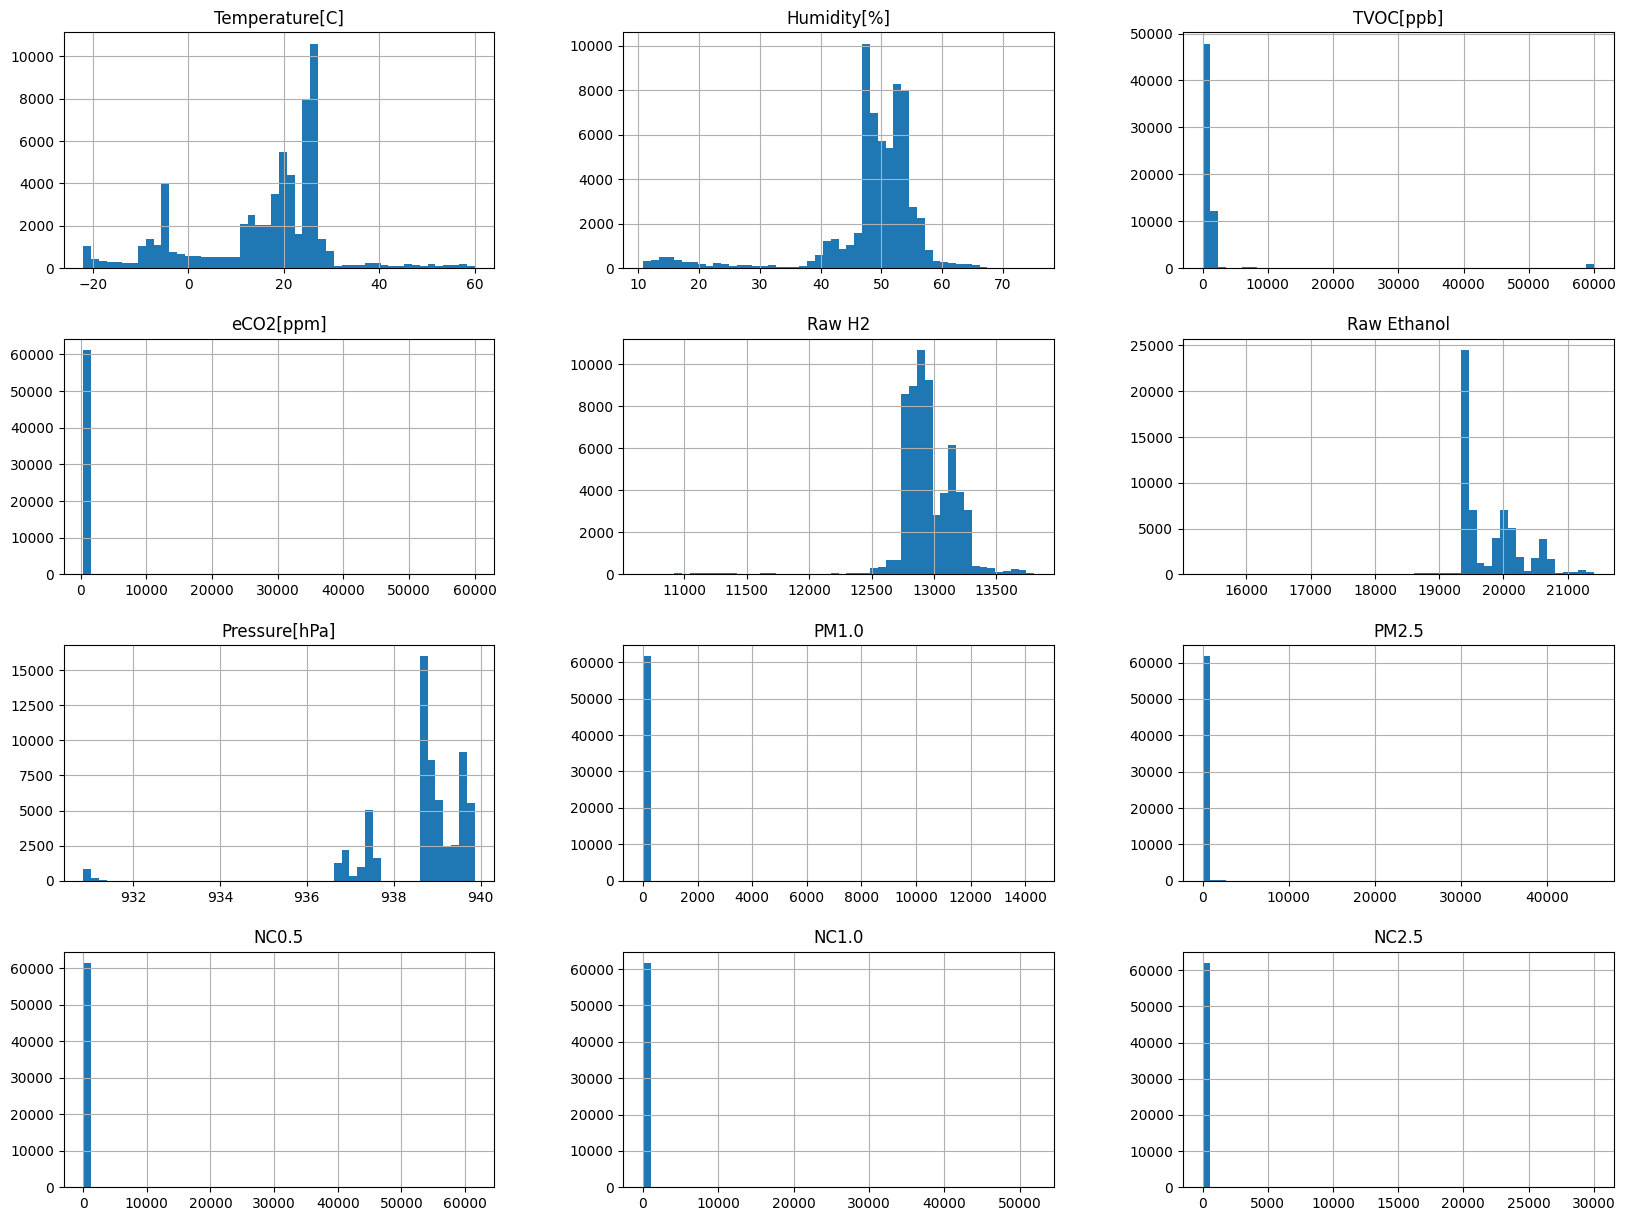

In [11]:
dataset.drop(["Fire Alarm"], axis=1).hist(bins=50, figsize=(20,15))
plt.show()

Notiamo che le possibili colonne con outlier sono: "TVOC[ppb]", "eCO2[ppm]", "Pressure[hPa]", "PM1.0", "PM2.5", "NC0.5", "NC1.0", "NC2.5", in quanto le misurazioni sono maggiormente concentrate in specifici intervalli di valori

In [12]:
outliers_columns = ["TVOC[ppb]", "eCO2[ppm]", "Pressure[hPa]","PM1.0", "PM2.5", "NC0.5", "NC1.0", "NC2.5"]

Ci chiediamo ora, non essendo esperti del dominio, se in effetti tali valori siano effettivamente outlier, dovuti ad esempio a sbagli nella misurazione da parte del sensore, o se essi siano effettivamente valori che assumono valori particolarmente alti o particolarmente bassi a seconda. Per la rilevazione degli outlier useremo lo **z-score**.

### Valutazione ed Eliminazione con **z-score**

Lo z-score misura la distanza di un valore dalla media in unità di deviazione standard.

Dato un valore $x$, una media $\mu$, ed una deviazione standard $\sigma$, si ha:

$z = \frac{x - \mu}{\sigma}$

Dato un valore positivo $n$, si stabilisce che un valore $|z|>n$ è considerato outlier; nel nostro caso $n=3$.

Calcoliamo lo z-score per ogni colonna con possibili outlier nel dataset.

In [13]:
from scipy.stats import zscore

def delete_outliers_z(data, column, threshold = 3):
    remaining_data = data[np.abs(zscore(data[column])) < threshold]
    data.loc[np.abs(zscore(data[column])) > threshold, ("Deleted")] = column
    outliers = data[np.abs(zscore(data[column])) > threshold]
    return remaining_data, outliers

In [14]:
dataset_z_score = dataset.copy()
outliers = pd.DataFrame()

for column in outliers_columns:
    dataset_z_score, out = delete_outliers_z(dataset_z_score, column)
    outliers = pd.concat([outliers, out])
    print(f"Column: {column.ljust(15)} - Found Outliers: {str(out.shape[0]).ljust(7)} - Total Outliers: {outliers.shape[0]}")

Column: TVOC[ppb]       - Found Outliers: 1270    - Total Outliers: 1270
Column: eCO2[ppm]       - Found Outliers: 340     - Total Outliers: 1610
Column: Pressure[hPa]   - Found Outliers: 814     - Total Outliers: 2424
Column: PM1.0           - Found Outliers: 66      - Total Outliers: 2490
Column: PM2.5           - Found Outliers: 32      - Total Outliers: 2522
Column: NC0.5           - Found Outliers: 0       - Total Outliers: 2522
Column: NC1.0           - Found Outliers: 8       - Total Outliers: 2530
Column: NC2.5           - Found Outliers: 152     - Total Outliers: 2682


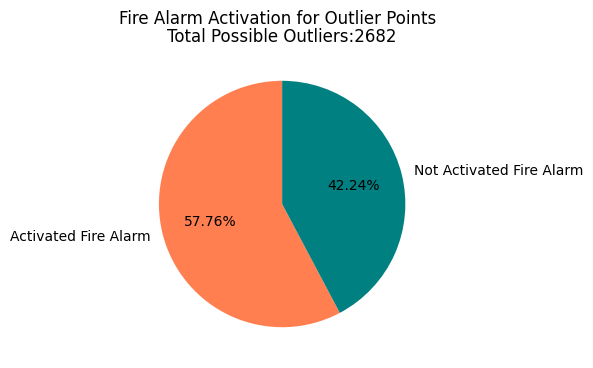

In [15]:
counts = outliers["Fire Alarm"].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=["Activated Fire Alarm", "Not Activated Fire Alarm"], autopct='%1.2f%%', startangle=90, colors=["coral", "teal"])
plt.suptitle("Fire Alarm Activation for Outlier Points")
plt.title(f"Total Possible Outliers:{outliers.shape[0]}")
plt.show()

Osserviamo che, in generale, i possibili outlier non si limitano a identificare semplicemente i punti di attivazione degli allarmi.

Le anomalie sono state riscontrate in quasi tutte le colonne. Procediamo quindi ad analizzare, colonna per colonna, se esistono relazioni significative tra di esse.

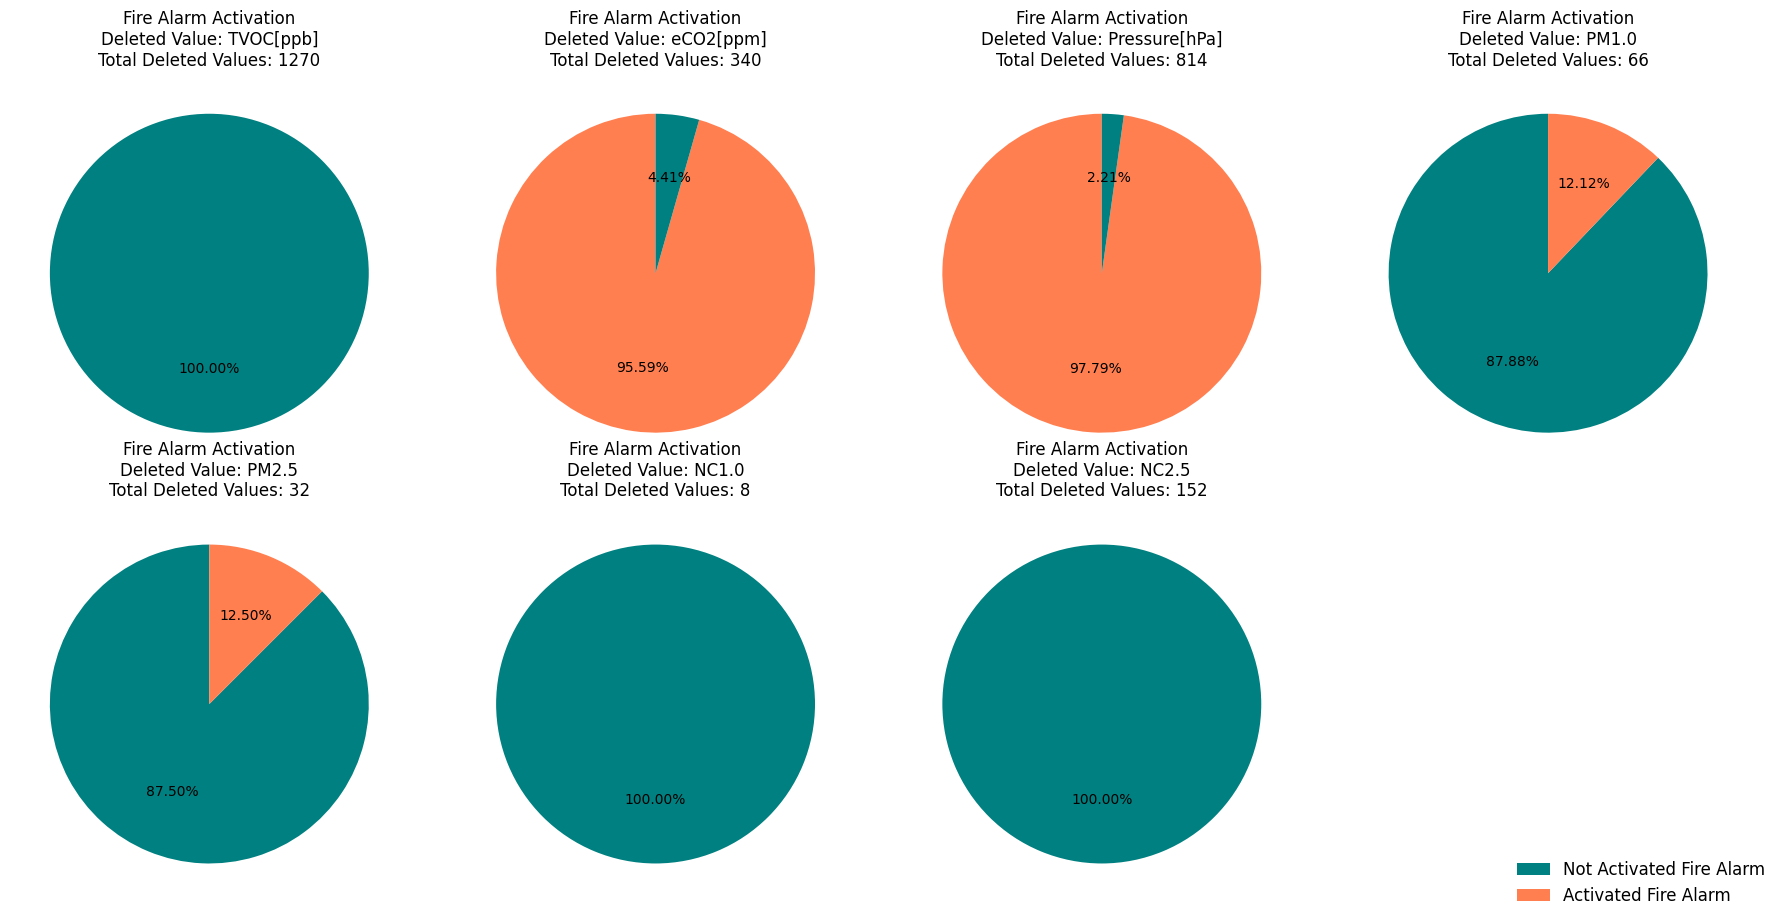

In [16]:
unique_deleted_values = outliers["Deleted"].unique()

fig, axs = plt.subplots(2, 4, figsize=(18, 10))
axs = axs.flatten()

labels = ["Not Activated Fire Alarm", "Activated Fire Alarm"]
color_map = {0: "teal", 1: "coral"}

for i, value in enumerate(unique_deleted_values):
    subset = outliers[outliers["Deleted"] == value]
    counts = subset["Fire Alarm"].value_counts()
    if len(counts) == 1:
        single_value = counts.index[0]
        pie_colors = [color_map[single_value]]
        pie_labels = [labels[single_value]]
    else:
        pie_colors = [color_map[val] for val in counts.index]
        pie_labels = [labels[val] for val in counts.index]
    axs[i].pie(counts, autopct='%1.2f%%', startangle=90, colors=pie_colors)
    axs[i].set_title(f"Fire Alarm Activation\nDeleted Value: {value}\nTotal Deleted Values: {subset.shape[0]}")

for j in range(i + 1, len(axs)):
    axs[j].axis("off")

fig.legend(labels, loc="lower right", ncol=1, frameon=False, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

Risulta evidente come a questo punto, sia probabile che questi punti non siano outliers, bensì veri e propri indicatori di un possibile allarme.
Ad esempio, per quanto riguarda la pressione, notiamo che i valori bassi che potevano essere identificati come outliers, in realtà hanno una forte correlazione con l'attivazione dell'allarme.
Tale esempio è applicabile anche ai restanti campi. Decidiamo dunque di esplorare la correlazione tra i vari attributi e lo scattare dell'allarme.

## Correlazione tra i dati

In [17]:
def show_fire_alarm_activation_plot(data, column, log_scale=False):

    fire_alarm_0 = data[data["Fire Alarm"] == 0][column]
    fire_alarm_1 = data[data["Fire Alarm"] == 1][column]
    
    bins = np.histogram_bin_edges(data[column], bins=30)
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    bins_0 = axs[0].hist(fire_alarm_0, bins=bins, alpha=0.7, label="Not Activated Fire Alarm", color="teal", edgecolor="black")
    bins_1 = axs[0].hist(fire_alarm_1, bins=bins, alpha=0.7, label="Activated Fire Alarm", color="coral", edgecolor="black")
    axs[0].set_title(f"{column} Values over Fire Alarm Activation")
    axs[0].set_ylabel("Total Fire Alarm Activations")
    axs[0].legend()
    axs[0].grid(axis="y", linestyle="--", alpha=0.7)

    axs[1].hist(fire_alarm_0, bins=bins, alpha=0.7, label="Not Activated Fire Alarm", color="teal", edgecolor="black")
    axs[1].set_title(f"{column} Values over not Activated Fire Alarm")
    axs[1].legend()
    axs[1].grid(axis="y", linestyle="--", alpha=0.7)

    axs[2].hist(fire_alarm_1, bins=bins, alpha=0.7, label="Activated Fire Alarm", color="coral", edgecolor="black")
    axs[2].set_title(f"{column} Values over Activated Fire Alarm")
    axs[2].legend()
    axs[2].grid(axis="y", linestyle="--", alpha=0.7)

    if log_scale:
        for ax in axs:
            ax.set_yscale("log")

    plt.tight_layout()
    plt.show()

### Temperatura

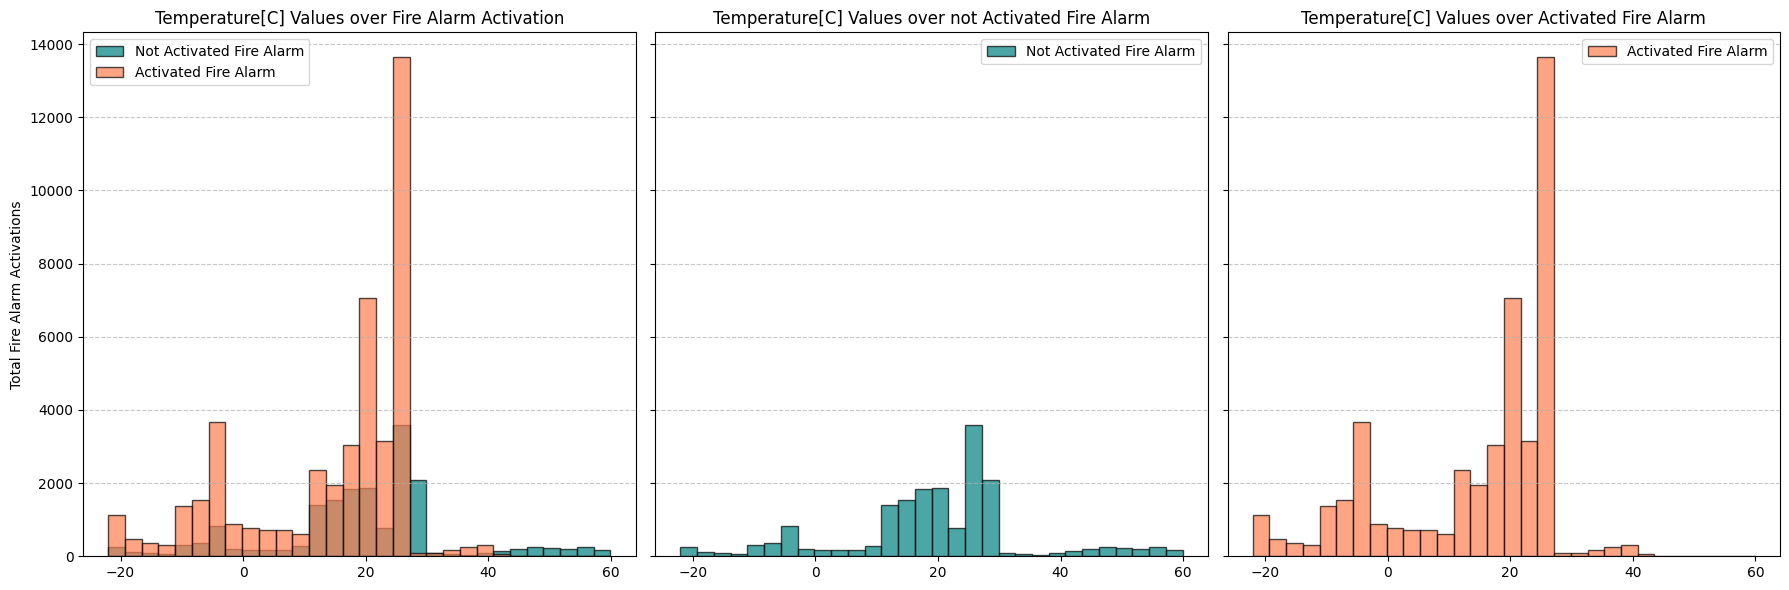

In [18]:
show_fire_alarm_activation_plot(dataset, "Temperature[C]")

### Humidity

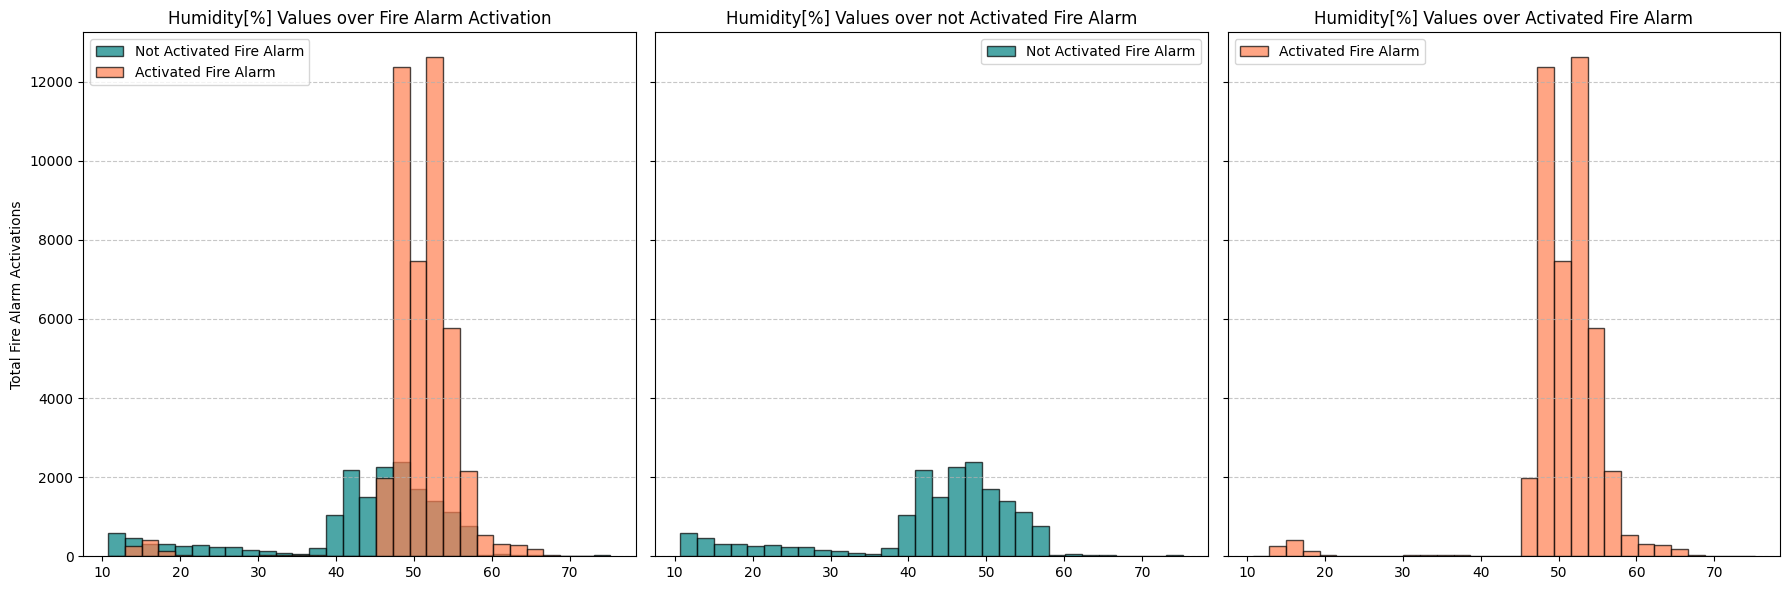

In [19]:
show_fire_alarm_activation_plot(dataset, "Humidity[%]")

### TVOC

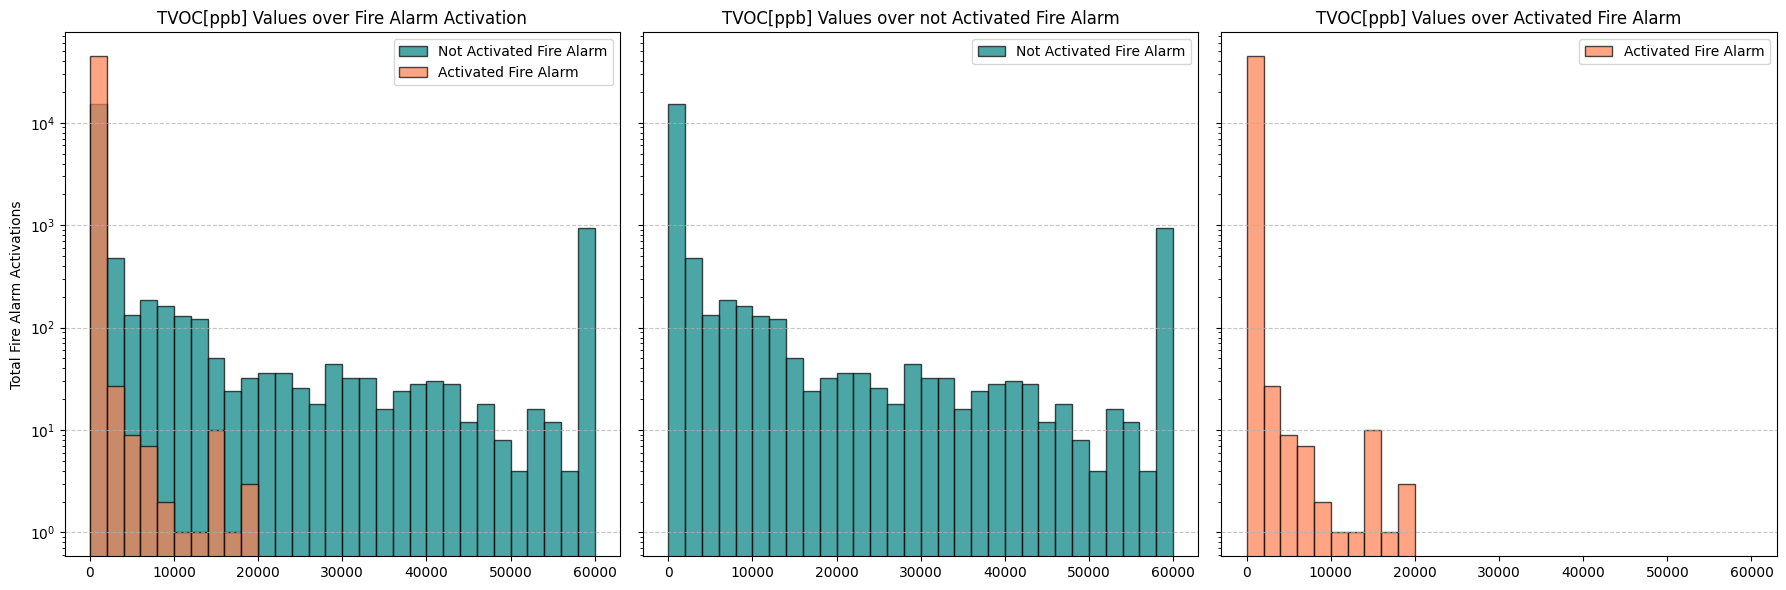

In [20]:
show_fire_alarm_activation_plot(dataset, "TVOC[ppb]", log_scale=True)

Si noti che questo ed alcuni dei grafici successivi, sull'asse $y$ presentano una scala logaritmica in quanto, se pur i valori sull'asse $x$ siano distribuiti abbastanza linearmente (nel caso `TVOC`: $0 \le \text{TVOC} \le 60000 $), sull'asse y si ha che i valori più alti sono a ridosso di $x \approx 0$; con un a scala lineare, rimarrebbero in vista solo tali valori a scapito degli altri.
Con questa scala riusciamo ad evidenziare meglio i valori lungo tutto l'asse x; si noti però che comunque la maggior parte dei record del dataset hanno, in questo caso, un $\text{TVOC} \le 2000$, a discapito di quanto si possa pensare da una prima occhiata sommaria al grafico, infatti:

In [21]:
low_TVOC_values = dataset.loc[dataset["TVOC[ppb]"] <= 2000, "TVOC[ppb]"].shape[0]
low_TVOC_percentage = np.round(low_TVOC_values / dataset.shape[0] * 100, 2)
print(f"TVOC values below 2000: {low_TVOC_values}\nPercentage: {low_TVOC_percentage}%")

TVOC values below 2000: 59899
Percentage: 95.64%


Tale osservazione è estendibile ad altri grafici con scala logaritmica

### eCO2

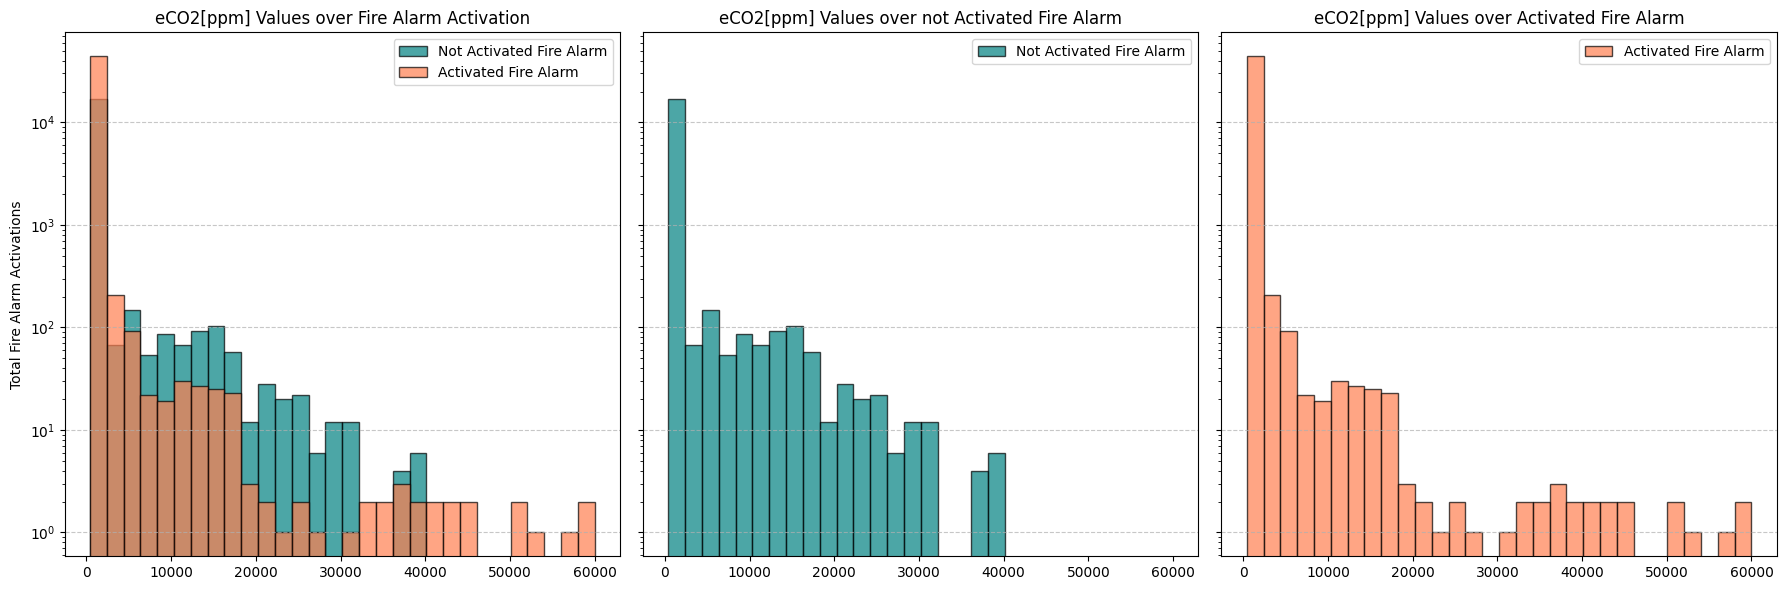

In [22]:
show_fire_alarm_activation_plot(dataset, "eCO2[ppm]", log_scale=True)

### Raw H2

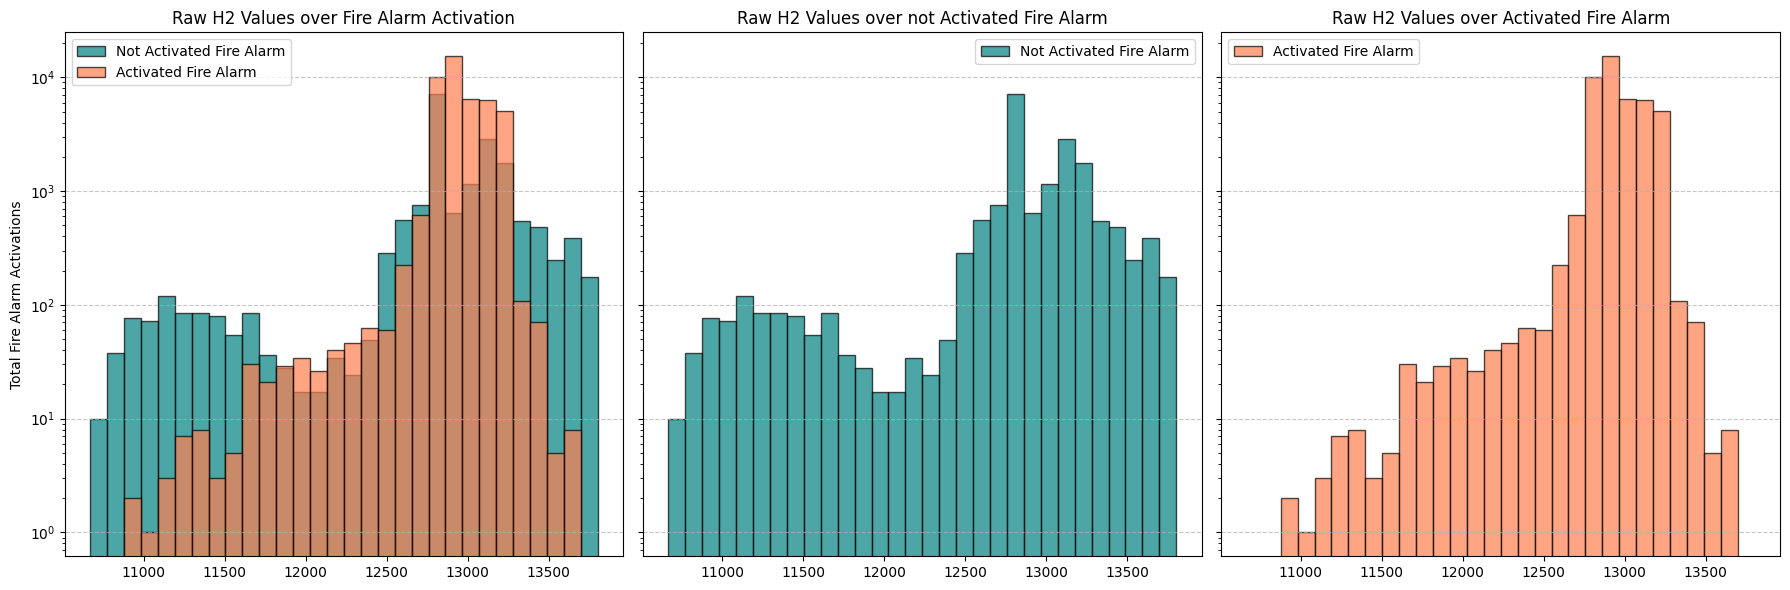

In [23]:
show_fire_alarm_activation_plot(dataset, "Raw H2", log_scale=True)

### Raw Ethanol

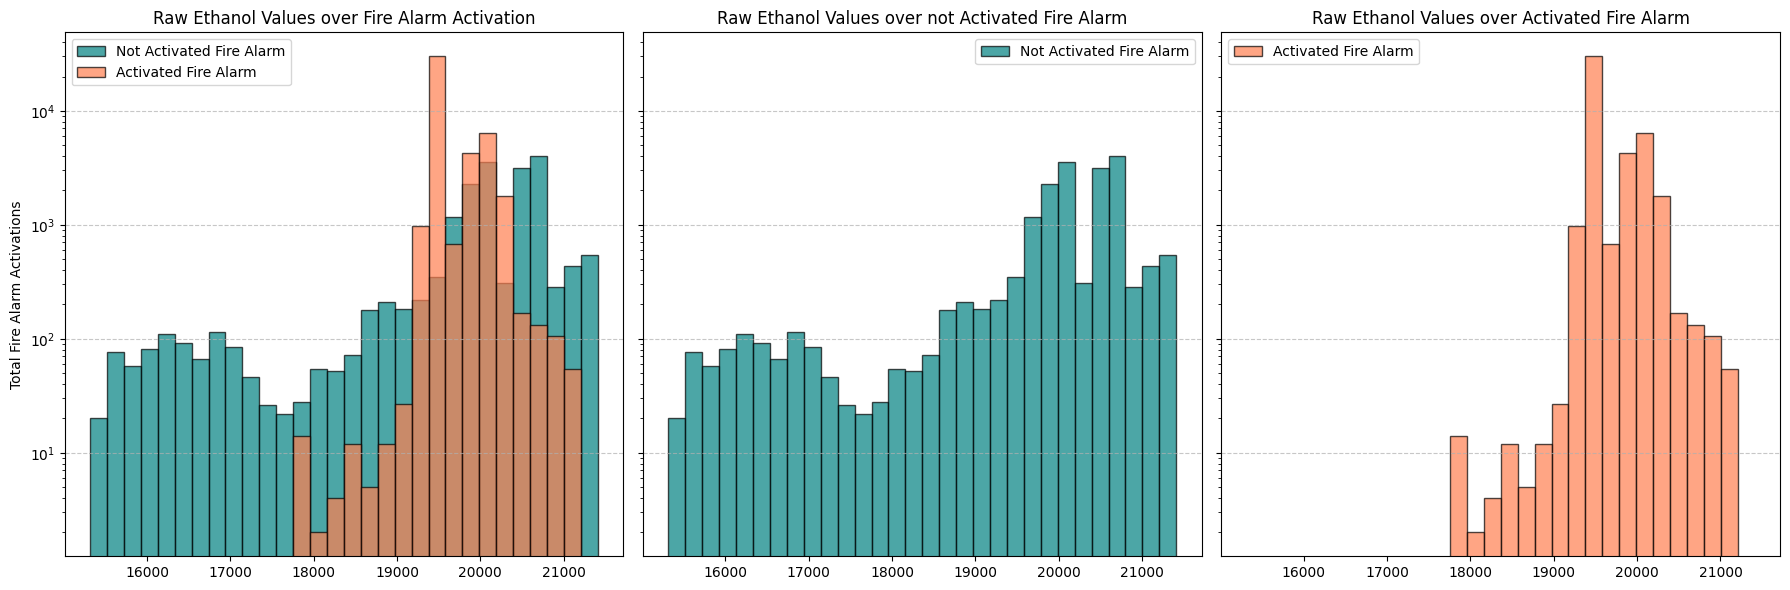

In [24]:
show_fire_alarm_activation_plot(dataset, "Raw Ethanol", log_scale=True)

### Pressure[hPa]

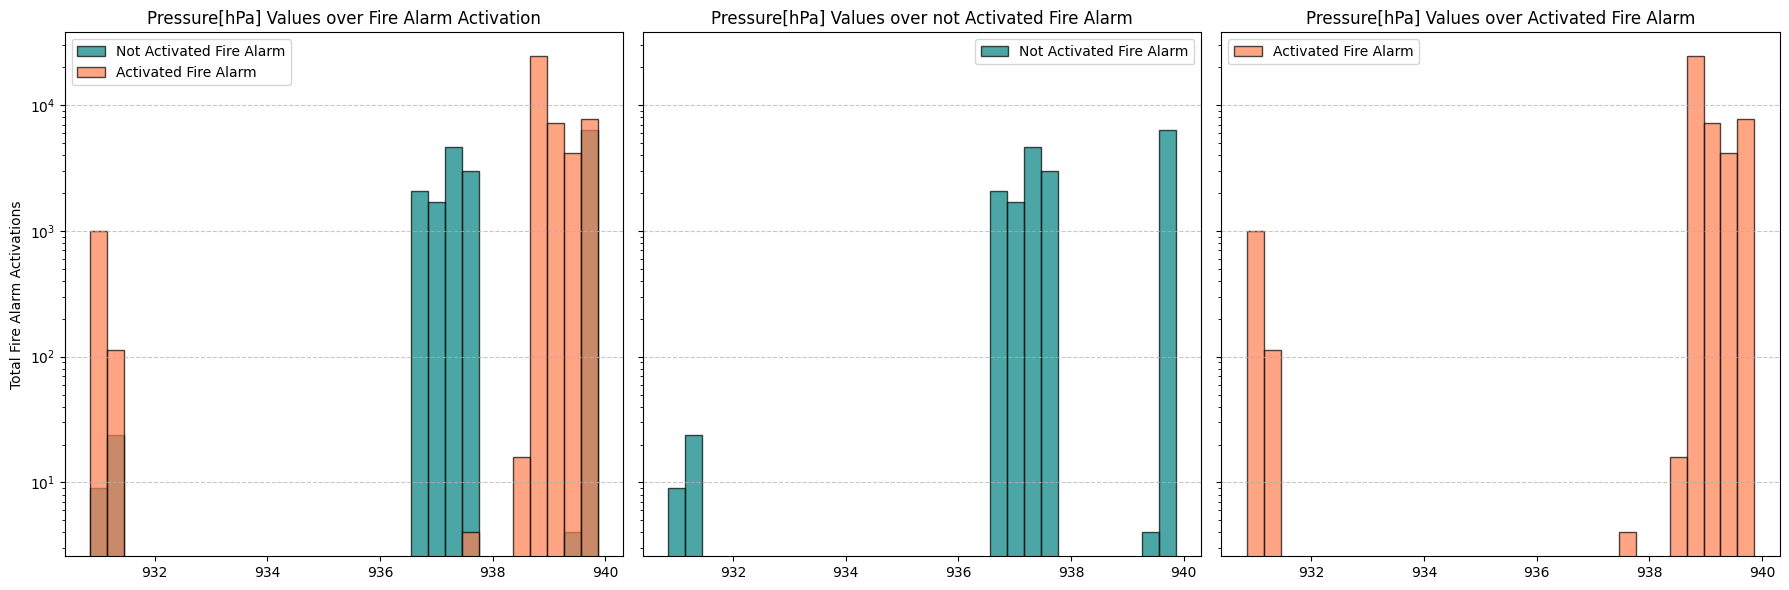

In [25]:
show_fire_alarm_activation_plot(dataset, "Pressure[hPa]", log_scale=True)

Contrariamente ad altri valori, la pressione indica, già graficamente, una netta separazione tra alcuni dei valori che attivano la soglia di allarme.
Ad esempio, data una pressione $p$, si ha (sommariamente) che:

$p \le 932 \implies \text{Fire Alarm} = 1$

$936 \le p \le 938 \implies \text{Fire Alarm} = 0$

$p > 938 \implies \text{Fire Alarm} = 1$

In generale, è probabile che la pressione sia un buon indicatore per la target feature.

### PM1.0

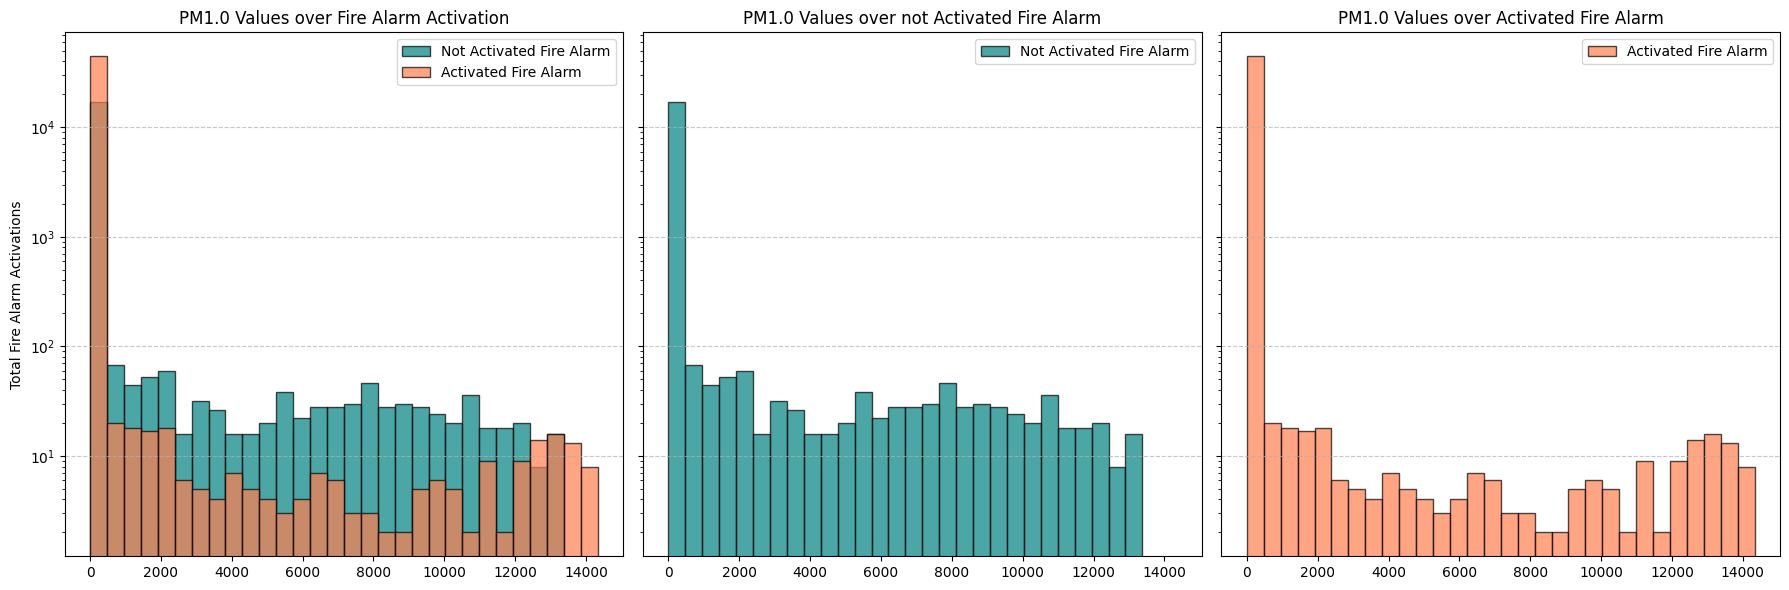

In [26]:
show_fire_alarm_activation_plot(dataset, "PM1.0", log_scale=True)

### PM2.5

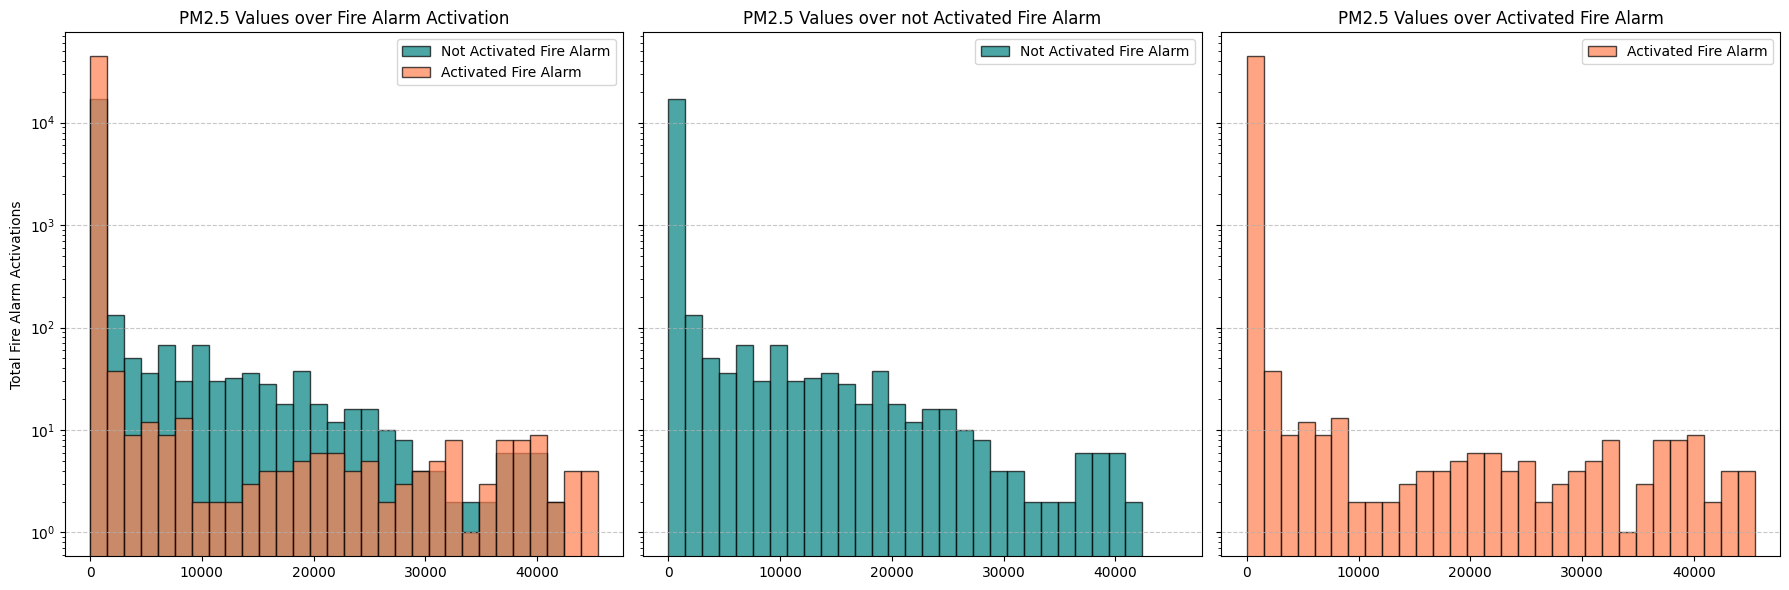

In [27]:
show_fire_alarm_activation_plot(dataset, "PM2.5", log_scale=True)

### NC0.5

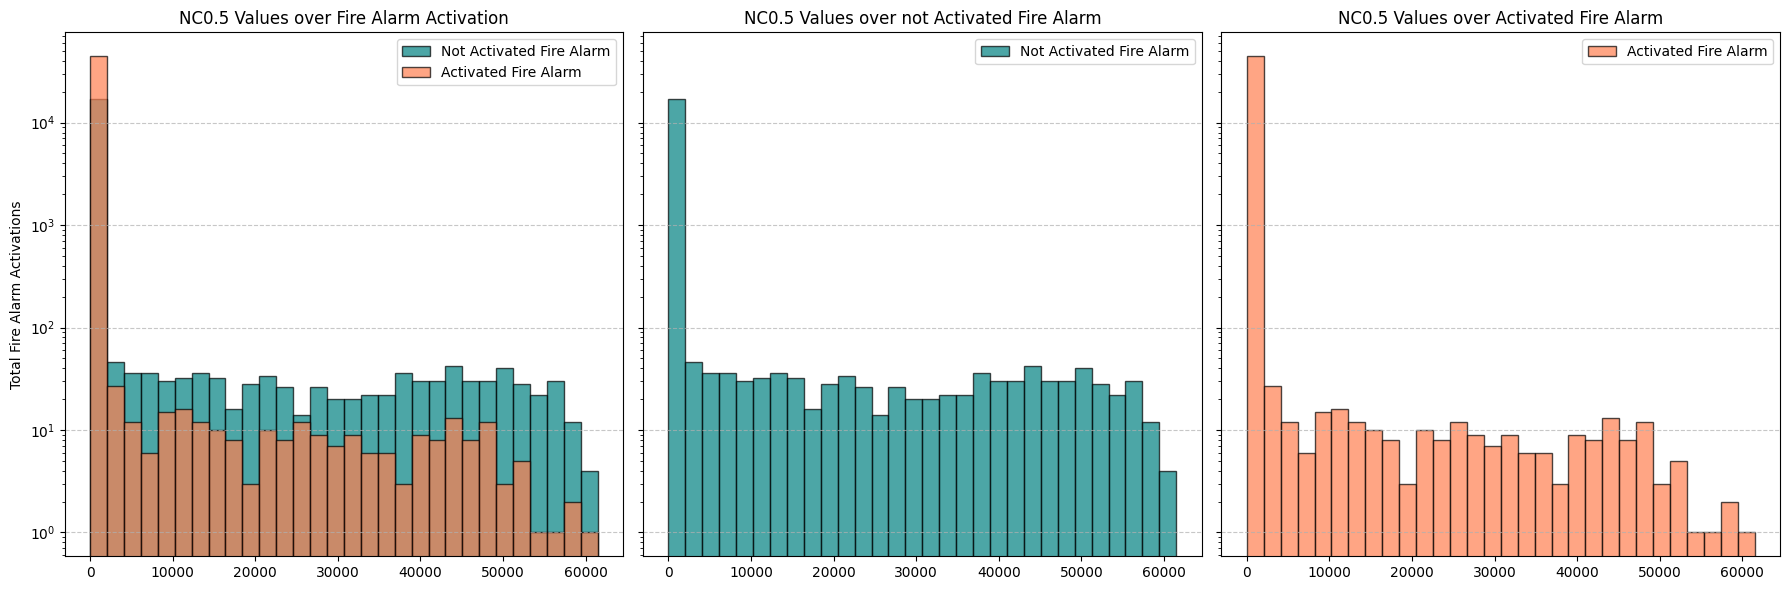

In [28]:
show_fire_alarm_activation_plot(dataset, "NC0.5", log_scale=True)

### NC1.0

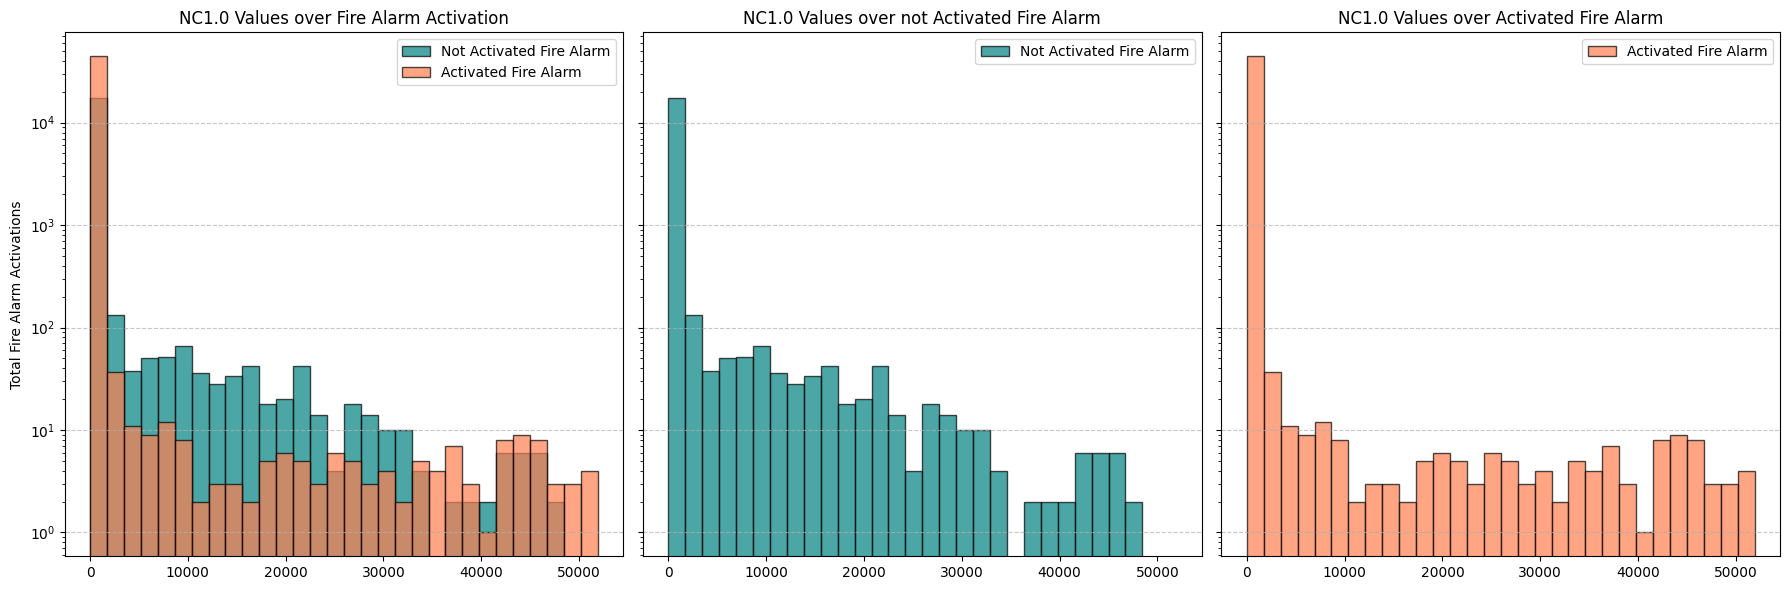

In [29]:
show_fire_alarm_activation_plot(dataset, "NC1.0", log_scale=True)

### NC2.5

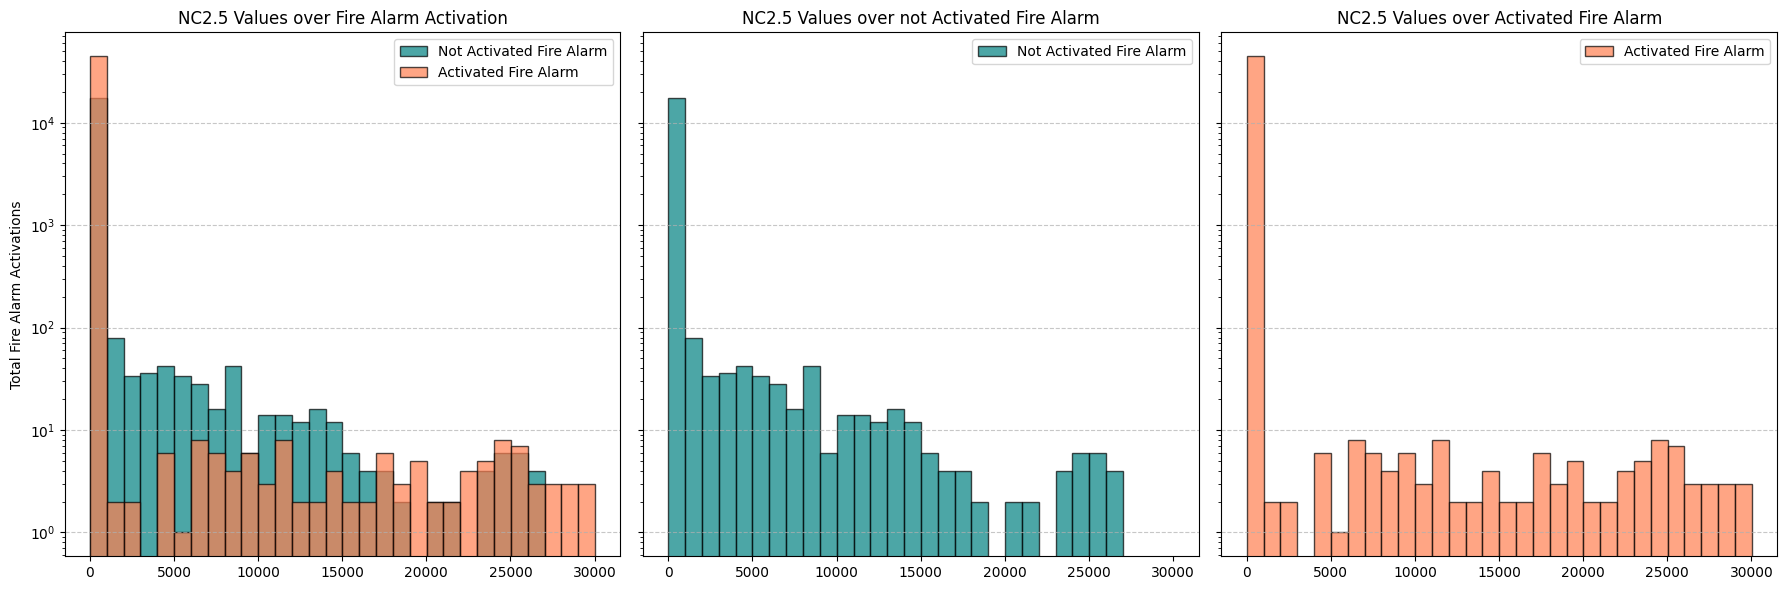

In [30]:
show_fire_alarm_activation_plot(dataset, "NC2.5", log_scale=True)

### Correlation Matrix

Visti ora i grafici che rapportano le varie feature alla target feature, cerchiamo di calcolare una correlazione tra di essere e soprattutto con la target feature, così da capire se alcune di queste sono particolarmente significative:

In [31]:
correlation = dataset.corr()
correlation

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118


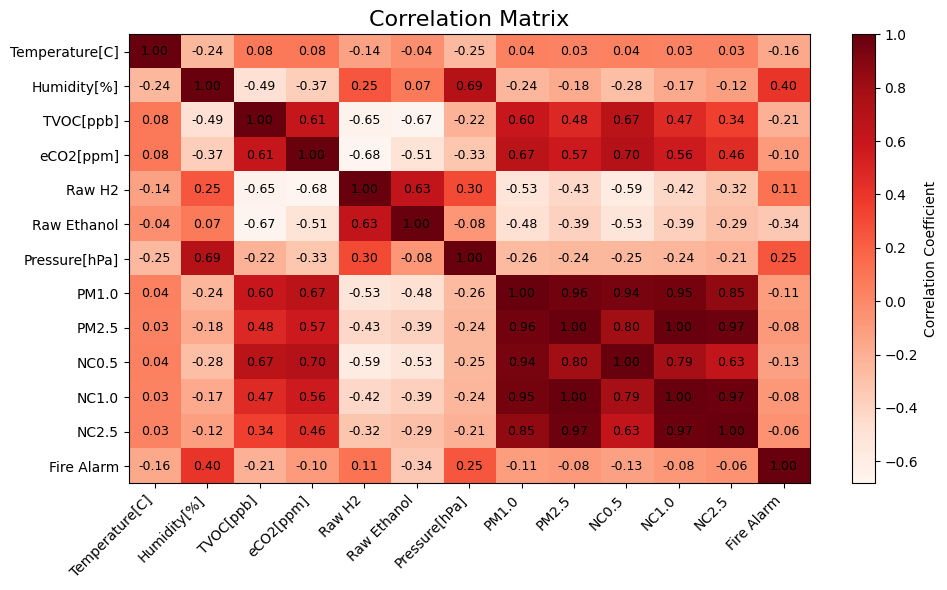

In [32]:
plt.figure(figsize=(10, 6))
plt.imshow(correlation, cmap="Reds", interpolation="none", aspect="auto")
plt.colorbar(label="Correlation Coefficient")

plt.xticks(ticks=np.arange(len(correlation.columns)), labels=correlation.columns, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(correlation.columns)), labels=correlation.columns)

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        plt.text(i, j, f"{correlation.iloc[i, j]:.2f}", ha="center", va="center", color="black", fontsize=9)

plt.title("Correlation Matrix", fontsize=16)

plt.tight_layout()
plt.show()

Considerando la correlazione alta quando ha un indice maggiore di 0.7, notiamo che tutti i dati di tipo "NC*" e "PM*" sono fortemente correlati tra loro, questo in quanto fanno riferimento alla concentrazione di particelle simili ma con spessori diversi: ne consegue che quando ad esempio le particelle `PM2.5` generalmente saranno in un numero simile e leggermente maggiore alle particelle `PM1.0`, dello stesso tipo ma con un diametro inferiore.

In generale, comunque, non si rilevano valori particolarmente significativi di correlazione delle varie feature con quella target

## Data Split

Dividiamo il dataset a nostra disposizione come sempre in tre parti, una per il training, una per la validation, una per il testing, dando rispettivamente il 60%, il 20% ed il 20% di parte del dataset.

In [33]:
from sklearn.model_selection import train_test_split
random_seed = 42

train_ratio = 0.60
test_ratio = 0.20
validation_ratio = 0.20

x_data = dataset.drop("Fire Alarm", axis=1)
y_data = dataset["Fire Alarm"]

x_train_val, x_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=test_ratio, random_state=random_seed)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=validation_ratio/(train_ratio+validation_ratio), random_state=random_seed)


Applichiamo poi lo scaling ai dati a nostra disposizione: (momentaneamente commentato per poter visualizzare meglio i valori nell'albero, da vedere cosa fare)

In [34]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_val = scaler.transform(x_val)
# x_test = scaler.transform(x_test)

Verifichiamo poi che la distribuzione della classe target si mantenga simile nelle diverse porzioni di dataset riservate:

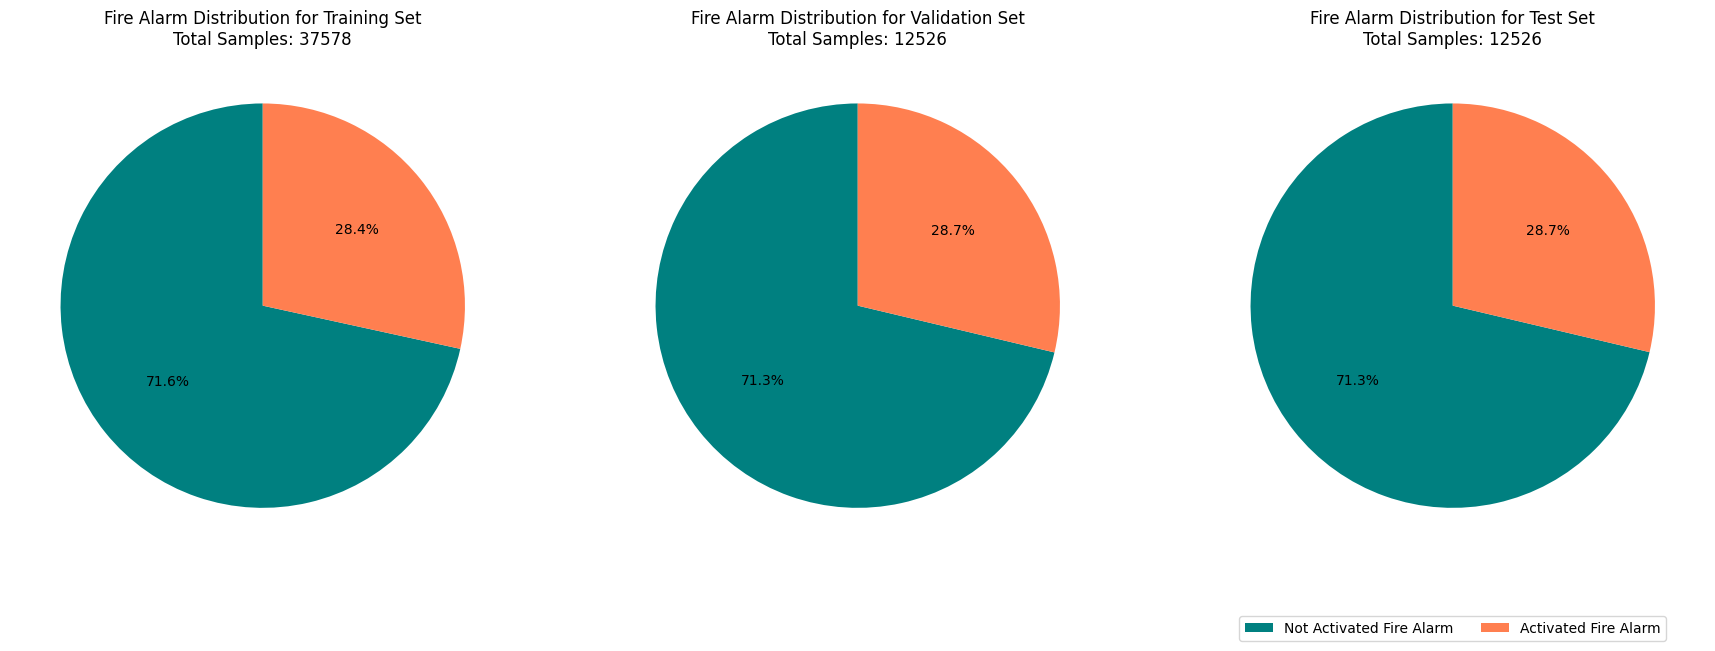

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
counts = y_train.value_counts()
axs[0].pie(counts, autopct='%1.1f%%', startangle=90, colors=["teal", "coral"])
axs[0].set_title(f"Fire Alarm Distribution for Training Set\nTotal Samples: {len(y_train)}")

counts = y_val.value_counts()
axs[1].pie(counts, autopct='%1.1f%%', startangle=90, colors=["teal", "coral"])
axs[1].set_title(f"Fire Alarm Distribution for Validation Set\nTotal Samples: {len(y_val)}")

counts = y_test.value_counts()
axs[2].pie(counts, autopct='%1.1f%%', startangle=90, colors=["teal", "coral"])
axs[2].set_title(f"Fire Alarm Distribution for Test Set\nTotal Samples: {len(y_test)}")

plt.legend(labels=["Not Activated Fire Alarm", "Activated Fire Alarm"], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.tight_layout()
plt.show()

# Model Creation

testiamo diversi modelli sui dati tenendo conto del tempo e dell'accuratezza di ognuno

In [36]:
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [37]:
models_list = [
    KNeighborsClassifier(),
    SGDClassifier(),
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    SVC(),
    GaussianNB(),
    DummyClassifier(),
    ExtraTreeClassifier(),
    DecisionTreeClassifier()
]
models = {}
# models = {model.__class__.__name__: {} for model in models_list}
# models["DefaultDecisionTreeClassifier"] = {}

In [38]:
# names = []
# scores = []
# times = []

# for model in models_list:
#     names.append(type(model).__name__)
#     start = time.time()
#     model.fit(np.concat([x_train, x_val]), np.concat([y_train, y_val]))
#     prediction = model.predict(x_test)
#     end = time.time()
#     accuracy = sk.metrics.accuracy_score(y_test, prediction)
#     scores.append(accuracy)
#     times.append(end - start)

# results = pd.DataFrame({"Model": names, "Accuracy": scores, "Time": times})
# results.sort_values("Accuracy", ascending=False, inplace=True)
# results


In [39]:
# fig = plt.figure(figsize=(12, 6))
# plt.barh(results["Model"], results["Accuracy"], color="coral")
# plt.xlabel("Accuracy")
# plt.title("Model Accuracy Comparison")
# plt.xlim(0, 1)
# plt.show()


In [40]:
# time comparison
# fig = plt.figure(figsize=(12, 6))
# plt.barh(results["Model"], results["Time"], color="teal")
# plt.xlabel("Time (seconds)")
# plt.title("Model Time Comparison")

# plt.show()

## Dummy Classifier

Il primo classificatore è un Dummy Classifier, ovvero un classificatore che non tiene conto delle feature in input.

In [41]:
dummy_model = DummyClassifier(random_state=random_seed)
dummy_model_name = dummy_model.__class__.__name__

start = time.time()
dummy_model.fit(x_train, y_train)
end = time.time()

dummy_prediction = dummy_model.predict(x_test)
dummy_accuracy = accuracy_score(y_test, dummy_prediction)

models[dummy_model_name] = {}
models[dummy_model_name]["model"] = dummy_model
models[dummy_model_name]["accuracy"] = dummy_accuracy
models[dummy_model_name]["time"] = end - start

unique, frequency = np.unique(dummy_prediction, return_counts = True)
print(f"{dummy_model_name}:\nPossible Predicted Values: {unique}\nPredicted Value - Frequency\n{str(unique[0]).ljust(15)} - {frequency[0]}\nAccuracy: {dummy_accuracy*100:.2f}%\nTraining Time: {end - start:.2f} seconds")

DummyClassifier:
Possible Predicted Values: [1]
Predicted Value - Frequency
1               - 12526
Accuracy: 71.31%
Training Time: 0.00 seconds


Utilizzando la strategia di default `prior`: il metodo di predizione ritorna sempre la label di maggior frequenza tra i valori `y` osservati. Ne consegue che avremo un output fisso ad 1, ovvero il valore di maggiore frequenza, ed l'accuracy sarà uguale alla presenza di 1 nel test set, ovvero il 71% circa.

## Decision Tree Classifier

Now we apply a basic Decision Tree Classifier; we do not apply any specific value for hyperparameters, just using default ones and a random seed for reproducibility.

Then, if we will need to adjust some of them, we will vary some hyperparameter.

In [42]:
decision_tree_model = DecisionTreeClassifier(random_state=random_seed)
decision_tree_model_name = decision_tree_model.__class__.__name__

start = time.time()
decision_tree_model.fit(x_train, y_train)
end = time.time()

default_tree_prediction = decision_tree_model.predict(x_test)
default_tree_accuracy = accuracy_score(y_test, default_tree_prediction)
default_tree_max_depth = decision_tree_model.get_depth()
default_tree_nodes = decision_tree_model.get_n_leaves()

models[decision_tree_model_name] = {}
models[decision_tree_model_name]["model"] = decision_tree_model
models[decision_tree_model_name]["accuracy"] = default_tree_accuracy
models[decision_tree_model_name]["time"] = end - start
models[decision_tree_model_name]["max depth"] = default_tree_max_depth

print(f"{decision_tree_model_name} with Default Values:\nAccuracy: {default_tree_accuracy*100:.2f}%\nTraining Time: {end - start:.2f} seconds\nNumber of Nodes: {default_tree_nodes}\nMaximum Depth: {default_tree_max_depth}")

DecisionTreeClassifier with Default Values:
Accuracy: 99.97%
Training Time: 0.10 seconds
Number of Nodes: 28
Maximum Depth: 8


Let's see a graphical representation of the tree:

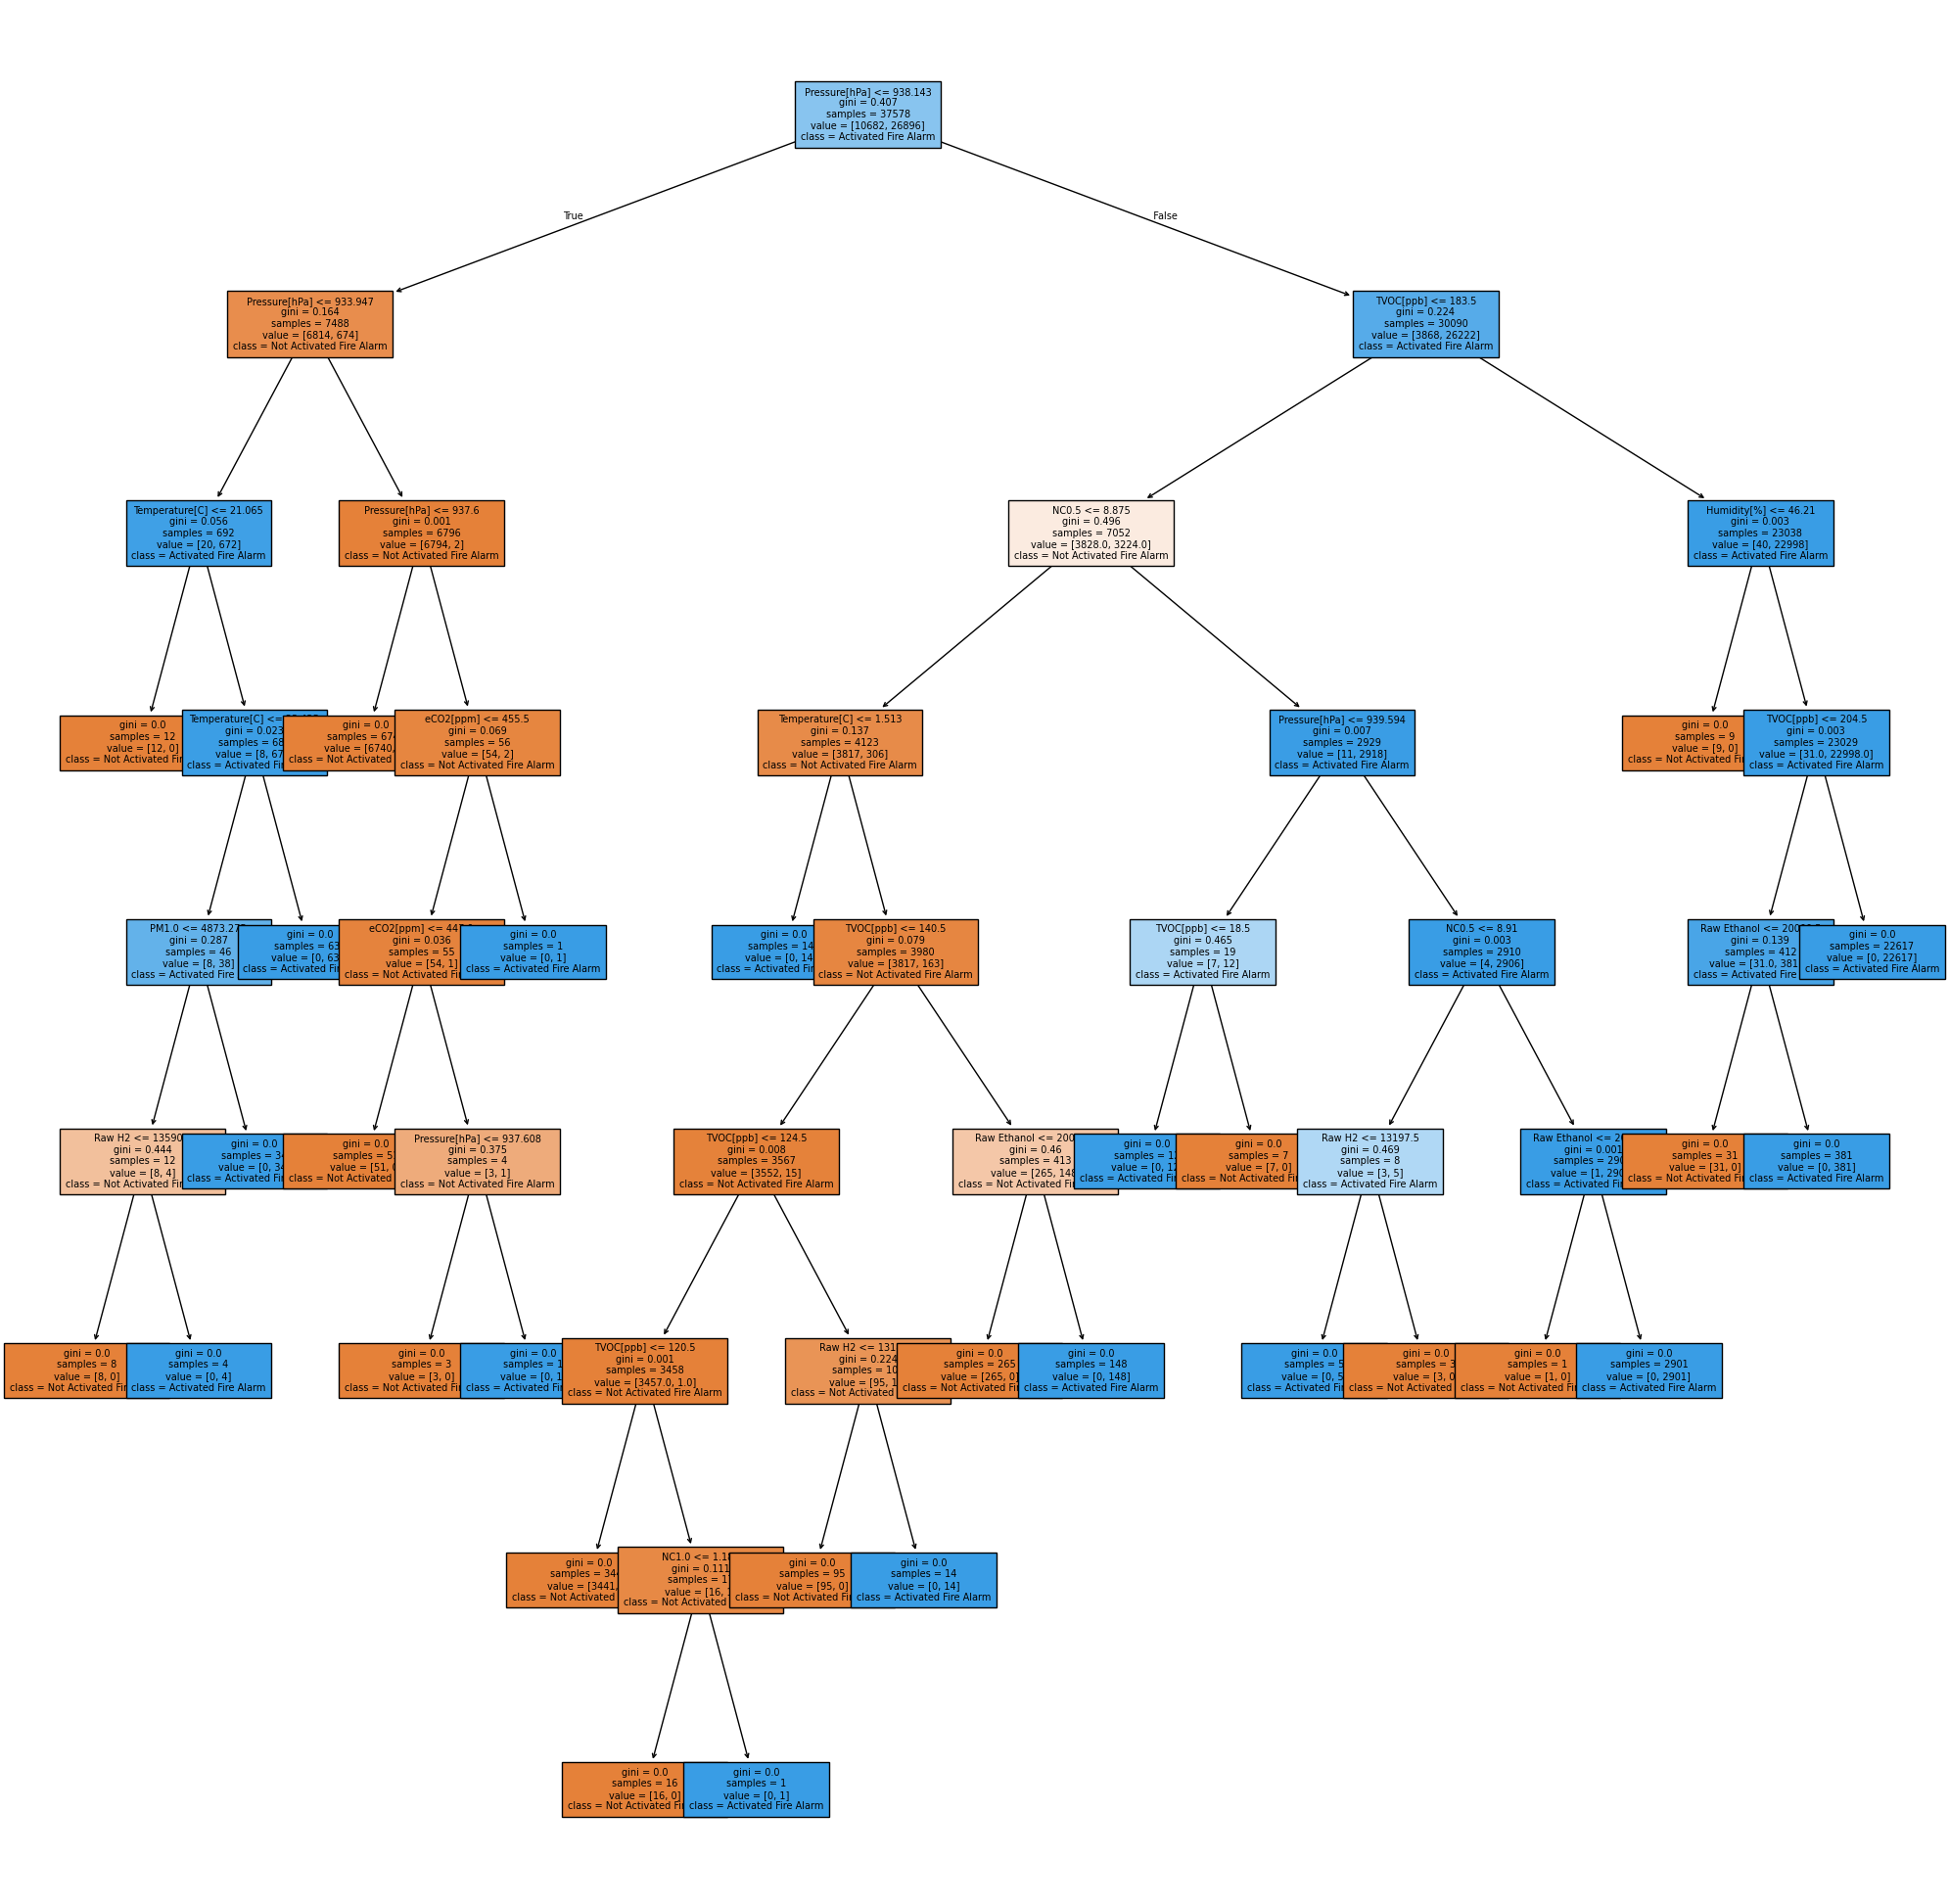

In [43]:
plt.figure(figsize=(25, 25))
sk.tree.plot_tree(decision_tree_model, filled=True, feature_names=x_data.columns, class_names=["Not Activated Fire Alarm", "Activated Fire Alarm"], fontsize=7)
plt.show()

As we already discussed, pressure value can be a pretty good feature for splitting, indeed the root node splits on 938.143, already identified as a possbile value for splitting.

In general, we can identify the importance of a feature and assign a percentage value:

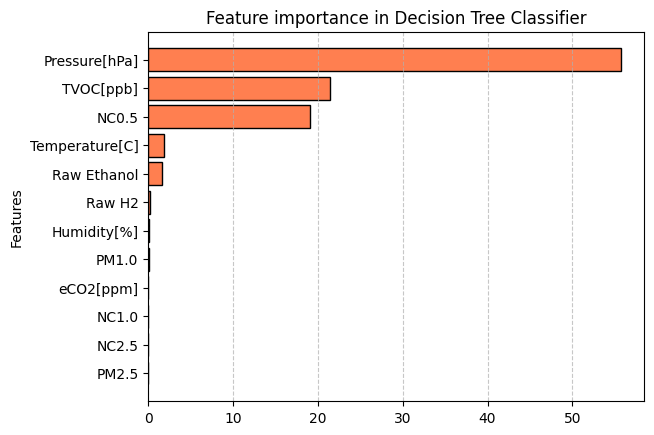

In [44]:
feature_importance_association = sorted(list(zip(x_train.columns, decision_tree_model.feature_importances_*100.0)), key=lambda x: x[1])
feature_importance_plot_x = [feature_name for feature_name, _ in feature_importance_association]
feature_importance_plot_y = [importance for _, importance in feature_importance_association]
plt.barh(feature_importance_plot_x, feature_importance_plot_y, color="coral", edgecolor="black")
plt.ylabel("Feature Importance [%]")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.title("Feature importance in Decision Tree Classifier")
plt.show()

We obtained a very high accuracy.

This result can be probably derived by the dataset distribution: as we have seen data is concentrated in one day, so they have almost the same distribution; also we don't have outliers.

So data have a defined pattern and they are pretty homogeneus, and so there is clear separability between the two classes, which is well identified from the Decisional Tree: this brings almost 100% accuracy.

Now, as seen in class, we try to vary the number of nodes of the tree, increasing its maximum depth. We try to verify if training set and validation set accuracy are diverging or not.

### Maximum Depth

In [45]:
train_results = []
val_results = []

depths = list(range(1, default_tree_max_depth))
nodes = []

for depth in depths:
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=random_seed)
    classifier.fit(x_train, y_train)

    train_tree_prediction = classifier.predict(x_train)
    accuracy_training = accuracy_score(y_train, train_tree_prediction)
    train_results.append(accuracy_training)

    y_val_prediction = classifier.predict(x_val)
    accuracy_val = accuracy_score(y_val, y_val_prediction)
    val_results.append(accuracy_val)
    nodes.append(classifier.get_n_leaves())


Graphically we can plot:

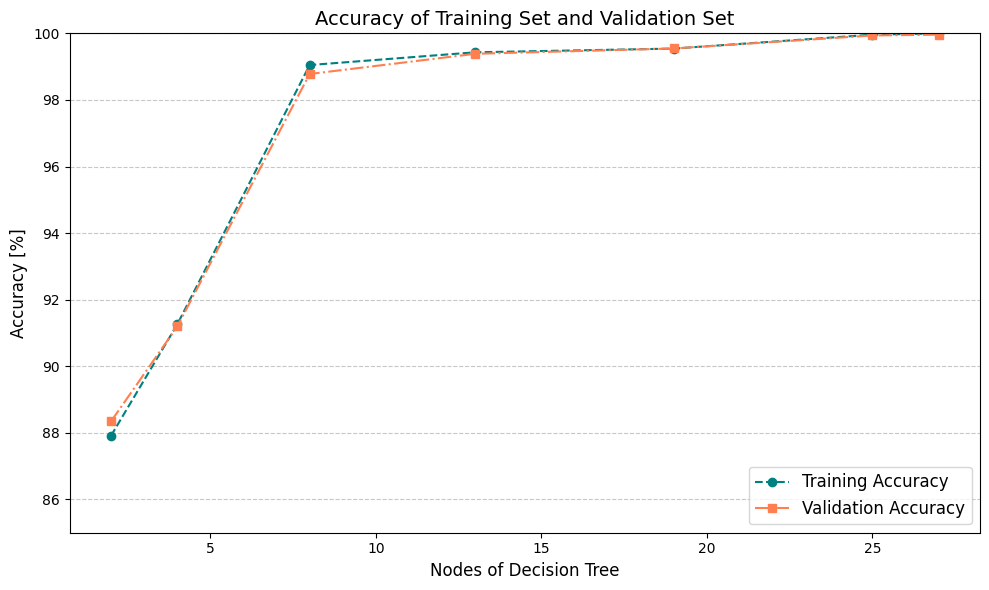

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(nodes, np.array(train_results) * 100, label="Training Accuracy", color="teal", marker="o", linestyle="--")
plt.plot(nodes, np.array(val_results) * 100, label="Validation Accuracy", color="coral", marker="s", linestyle="-.")

plt.xlabel("Nodes of Decision Tree", fontsize=12)
plt.ylabel("Accuracy [%]", fontsize=12)
plt.ylim(85, 100)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="lower right", fontsize=12)
plt.title("Accuracy of Training Set and Validation Set", fontsize=14)

plt.tight_layout()
plt.show()


Often, validation set accuracy diverges from training set accuracy (overfitting).

In this case dataset is simpler and the distribution is similar (probably beacuase of the time distribution), this has a consequance: the Decisional Tree generalizes well on both sets. Also we don't have significant rumor or outliers.

The final result is that both training set and validation set get always closer and closer to 100% accuracy. 

## Random Forest Classifier

We now try using random forest, to see if randomization on both dataset records and features brings different results.

In [47]:
random_forest_model = RandomForestClassifier(random_state=random_seed, oob_score=True)
random_forest_model_name = random_forest_model.__class__.__name__

start = time.time()
random_forest_model.fit(x_train_val, y_train_val)
end = time.time()

random_forest_prediction = random_forest_model.predict(x_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_prediction)
random_forest_estimators = random_forest_model.n_estimators

models[random_forest_model_name] = {}
models[random_forest_model_name]["model"] = random_forest_model
models[random_forest_model_name]["accuracy"] = random_forest_accuracy
models[random_forest_model_name]["time"] = end - start
models[random_forest_model_name]["estimators"] = random_forest_estimators

print(f"{random_forest_model_name} with Default Values:\nAccuracy: {random_forest_accuracy*100:.2f}%\nTraining Time: {end - start:.2f} seconds\nEstimators: {random_forest_estimators}")

RandomForestClassifier with Default Values:
Accuracy: 100.00%
Training Time: 3.49 seconds
Estimators: 100


In [48]:
estimators = list(range(40, 201, 20))
accuracy = []

for total_estimators in estimators:
    random_forest = RandomForestClassifier(n_estimators=total_estimators, oob_score=True, random_state=random_seed)
    random_forest.fit(x_train_val, y_train_val)
    predictions = random_forest.predict(x_test)
    acc = accuracy_score(y_test, predictions)
    accuracy.append(acc)

/tmp/ipykernel_19341/3005699499.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right", fontsize=12)


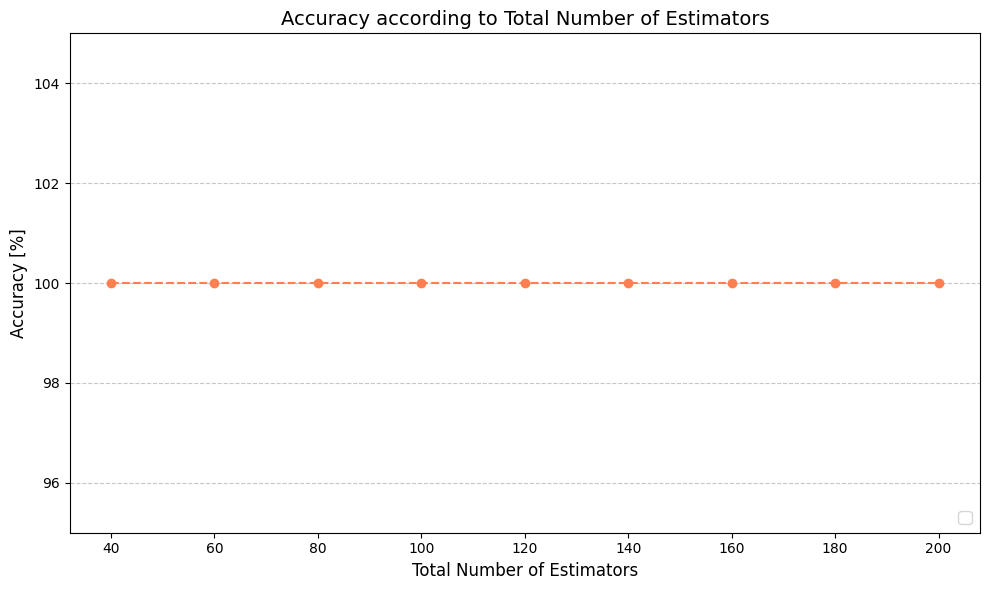

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(estimators, np.array(accuracy) * 100, color="coral", marker="o", linestyle="--")

plt.xlabel("Total Number of Estimators", fontsize=12)
plt.ylabel("Accuracy [%]", fontsize=12)
plt.xticks(estimators)
plt.ylim(95, 105)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="lower right", fontsize=12)
plt.title("Accuracy according to Total Number of Estimators", fontsize=14)

plt.tight_layout()
plt.show()

anche cambiando altri parametri probabilmente non cambia, vista anche la precisione di un tree normale....

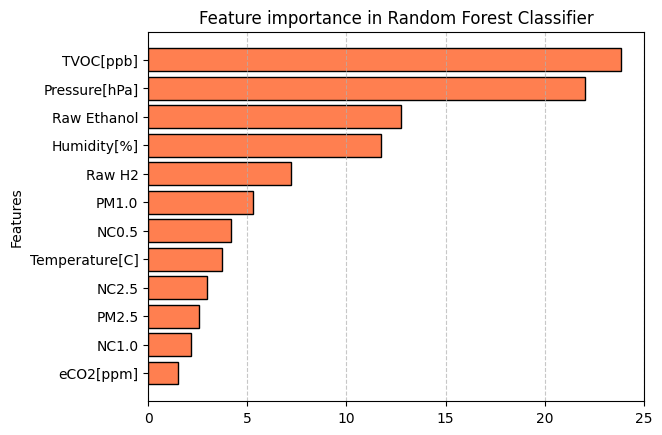

In [50]:
feature_importance_association = sorted(list(zip(x_train.columns, random_forest_model.feature_importances_*100.0)), key=lambda x: x[1])
feature_importance_plot_x = [feature_name for feature_name, _ in feature_importance_association]
feature_importance_plot_y = [importance for _, importance in feature_importance_association]
plt.barh(feature_importance_plot_x, feature_importance_plot_y, color="coral", edgecolor="black")
plt.ylabel("Feature Importance [%]")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.title("Feature importance in Random Forest Classifier")
plt.show()

sono diverse perchè:
Una Random Forest è un insieme di alberi decisionali costruiti su sottoinsiemi casuali dei dati e delle feature:

Ogni albero considera solo un sottoinsieme delle feature a ogni split, riducendo il rischio che una sola feature dominante influenzi il modello. Questo porta a una distribuzione più equilibrata dell'importanza tra le feature.
La feature importance in una Random Forest è calcolata come la media delle importanze assegnate a ciascuna feature dai singoli alberi. Questa media riduce la varianza, ma può "diluire" l'importanza di feature fortemente influenti in singoli alberi.

 I Decision Tree tendono a favorire feature con una forte correlazione con il target, inoltre Poiché non c'è campionamento casuale, l'albero è deterministico e le importanze delle feature dipendono interamente dalla struttura dell'albero ottimizzato sui dati di training.

## Bagging Classifier

bagging è simile alle random forest ma non fa sampling delle features, vediamo come va:

In [51]:
bagging_model = BaggingClassifier(random_state=random_seed)
bagging_model_name = bagging_model.__class__.__name__

start = time.time()
bagging_model.fit(x_train_val, y_train_val)
end = time.time()

bagging_prediction = bagging_model.predict(x_test)
bagging_accuracy = accuracy_score(y_test, bagging_prediction)
bagging_estimators = bagging_model.n_estimators

models[bagging_model_name] = {}
models[bagging_model_name]["model"] = bagging_model
models[bagging_model_name]["accuracy"] = bagging_accuracy
models[bagging_model_name]["time"] = end - start
models[bagging_model_name]["estimators"] = bagging_estimators

print(f"{bagging_model_name} with Default Values:\nAccuracy: {bagging_accuracy*100:.2f}%\nTraining Time: {end - start:.2f} seconds\nEstimators: {bagging_estimators}")

BaggingClassifier with Default Values:
Accuracy: 99.98%
Training Time: 0.90 seconds
Estimators: 10


abbiamo capito che a cambiare il numero di estimators non cambia niente quindi voliamo dritti alla feature importance

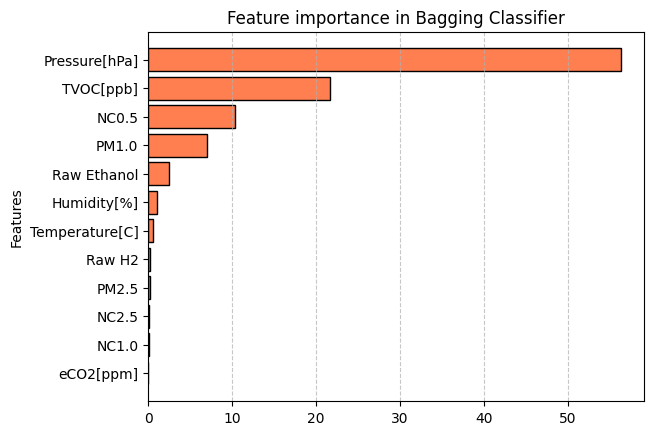

In [52]:
feature_importance = np.zeros(bagging_model.n_features_in_)
for estimator in bagging_model.estimators_:
    feature_importance += estimator.feature_importances_
feature_importance /= bagging_estimators

feature_importance_association = sorted(list(zip(x_train.columns, feature_importance*100.0)), key=lambda x: x[1])
feature_importance_plot_x = [feature_name for feature_name, _ in feature_importance_association]
feature_importance_plot_y = [importance for _, importance in feature_importance_association]

plt.barh(feature_importance_plot_x, feature_importance_plot_y, color="coral", edgecolor="black")
plt.ylabel("Feature Importance [%]")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.title("Feature importance in Bagging Classifier")
plt.show()

molto più simile al tree normale perchè non abbiamo feature selection, in generale il bagging è composto di decision tree quindi anche qui siamo vicini al 100%

## Boosting

ijdfieiufdeifenfdciof bla bla bla

In [53]:
adaboost_model = AdaBoostClassifier(random_state=random_seed, algorithm="SAMME")
adaboost_model_name = adaboost_model.__class__.__name__

start = time.time()
adaboost_model.fit(x_train, y_train)
end = time.time()

adaboost_prediction = adaboost_model.predict(x_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_prediction)
adaboost_estimators = adaboost_model.n_estimators

models[adaboost_model_name] = {}
models[adaboost_model_name]["model"] = adaboost_model
models[adaboost_model_name]["accuracy"] = bagging_accuracy
models[adaboost_model_name]["time"] = end - start
models[adaboost_model_name]["estimators"] = adaboost_estimators

print(f"{adaboost_model_name} with Default Values:\nAccuracy: {adaboost_accuracy*100:.2f}%\nTraining Time: {end - start:.2f} seconds\nEstimators: {adaboost_estimators}")

AdaBoostClassifier with Default Values:
Accuracy: 99.72%
Training Time: 1.33 seconds
Estimators: 50


Anche qui no sampling quindi abbiamo il solito schema di feature importance

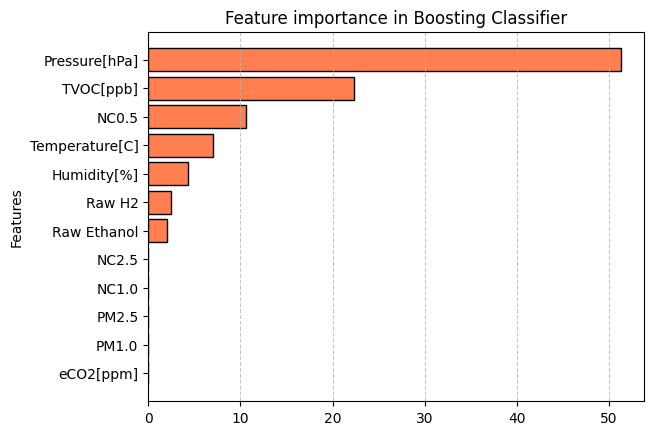

In [54]:
feature_importance_association = sorted(list(zip(x_train.columns, adaboost_model.feature_importances_*100.0)), key=lambda x: x[1])
feature_importance_plot_x = [feature_name for feature_name, _ in feature_importance_association]
feature_importance_plot_y = [importance for _, importance in feature_importance_association]

plt.barh(feature_importance_plot_x, feature_importance_plot_y, color="coral", edgecolor="black")
plt.ylabel("Feature Importance [%]")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.title("Feature importance in Boosting Classifier")
plt.show()

## Support Vector Machine

In [55]:
linear_svc_model = LinearSVC(random_state=random_seed)
linear_svc_model_name = linear_svc_model.__class__.__name__

start = time.time()
linear_svc_model.fit(x_train, y_train)
end = time.time()

linear_svc_prediction = linear_svc_model.predict(x_test)
linear_svc_accuracy = accuracy_score(y_test, linear_svc_prediction)

print(f"{linear_svc_model_name} with Default Values:\nAccuracy: {linear_svc_accuracy*100:.2f}%\nTraining Time: {end - start:.2f} seconds")

LinearSVC with Default Values:
Accuracy: 88.38%
Training Time: 0.23 seconds


In [56]:
svc_model = SVC(random_state=random_seed)
svc_model_name = svc_model.__class__.__name__

start = time.time()
svc_model.fit(x_train, y_train)
end = time.time()

svc_prediction = svc_model.predict(x_test)
svc_accuracy = accuracy_score(y_test, svc_prediction)

print(f"{svc_model_name} with Default Values:\nAccuracy: {svc_accuracy*100:.2f}%\nTraining Time: {end - start:.2f} seconds")

SVC with Default Values:
Accuracy: 88.54%
Training Time: 17.15 seconds


In [57]:
svc_poly_model = SVC(kernel="poly", random_state=random_seed)
svc_poly_model_name = svc_model.__class__.__name__

start = time.time()
svc_poly_model.fit(x_train, y_train)
end = time.time()

svc_poly_prediction = svc_poly_model.predict(x_test)
svc_poly_accuracy = accuracy_score(y_test, svc_poly_prediction)

print(f"{svc_poly_model_name} with Default Values:\nAccuracy: {svc_poly_accuracy*100:.2f}%\nTraining Time: {end - start:.2f} seconds")

SVC with Default Values:
Accuracy: 88.66%
Training Time: 13.20 seconds


In [139]:
from sklearn.preprocessing import StandardScaler

def train_svm(kernel, x_train, y_train, x_test, y_test, scale=True, train_ratio=1.0, random_seed=random_seed):
    svc_model = SVC(kernel=kernel, random_state=random_seed)
    svc_model_name = f"{svc_model.__class__.__name__}_{kernel.title()}Kernel_{x_train.shape[1]}Features"
    
    training_data = x_train
    test_data = x_test

    if scale:
        scaler = StandardScaler()
        training_data = scaler.fit_transform(x_train)
        test_data = scaler.transform(x_test)

    if 0.0 <= train_ratio < 1.0:
        training_data, test_data, y_train, y_test = train_test_split(x_train, y_train, test_size=1.0-train_ratio, random_state=random_seed)

    start = time.time()
    svc_model.fit(training_data, y_train)
    end = time.time()

    svc_prediction = svc_model.predict(test_data)
    svc_accuracy = accuracy_score(y_test, svc_prediction)
    
    models[svc_model_name] = {}
    models[svc_model_name]["model"] = svc_model
    models[svc_model_name]["accuracy"] = svc_accuracy
    models[svc_model_name]["time"] = end - start
    models[svc_model_name]["train ratio"] = train_ratio
    models[svc_model_name]["scale"] = scale
  
    print(f"{svc_model_name}:\nTraining Ratio: {train_ratio} over Standard Training Set\nTotal Features: {svc_model.n_features_in_}\nScaling: {scale}\nAccuracy: {svc_accuracy*100:.2f}%\nTraining Time: {end - start:.2f} seconds")
    return svc_model, training_data, test_data, y_train, y_test

In [59]:
from sklearn.decomposition import PCA

def reduce_dimensionality(x_train, x_test, n_components=2, random_seed=random_seed):
    pca = PCA(n_components=n_components, random_state=random_seed)

    x_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    
    return x_pca, x_test_pca

In [143]:
def plot_svm_results(model, x_train_2d, y_train):

    support_vectors = model.support_vectors_

    x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
    y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_predictions = model.predict(grid_points)
    grid_predictions = grid_predictions.reshape(xx.shape)

    zoom_x_min, zoom_x_max = -2, 5
    zoom_y_min, zoom_y_max = -8, 3
    zoom_xx, zoom_yy = np.meshgrid(
        np.linspace(zoom_x_min, zoom_x_max, 100),
        np.linspace(zoom_y_min, zoom_y_max, 100)
    )
    zoom_grid_points = np.c_[zoom_xx.ravel(), zoom_yy.ravel()]
    zoom_grid_predictions = model.predict(zoom_grid_points)
    zoom_grid_predictions = zoom_grid_predictions.reshape(zoom_xx.shape)

    plt.figure(figsize=(20, 16))

    plt.subplot(2, 1, 1)
    plt.contourf(xx, yy, grid_predictions, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(x_train_2d[y_train == 0, 0], x_train_2d[y_train == 0, 1], color="teal", label="Not Activated Fire Alarm", edgecolors="k", alpha=0.7)
    plt.scatter(x_train_2d[y_train == 1, 0], x_train_2d[y_train == 1, 1], color="coral", label="Activated Fire Alarm", edgecolors="k", alpha=0.7)
    plt.scatter(
        support_vectors[:, 0], 
        support_vectors[:, 1], 
        s=100, facecolors="none", edgecolors="k", label="Support Vectors"
    )
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("Decision Boundary SVM with Support Vectors in 2D reduced space")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.subplot(2, 1, 2)
    plt.contourf(zoom_xx, zoom_yy, zoom_grid_predictions, alpha=0.8, cmap=plt.cm.coolwarm)
    support_vector_labels = y_train.to_numpy()[model.support_]
    sv_label_0 = support_vectors[support_vector_labels == 0]
    sv_label_1 = support_vectors[support_vector_labels == 1]
    plt.scatter(sv_label_0[:, 0], sv_label_0[:, 1], color="teal", label="Zoomed Support Vectors with Not Activated Fire Alarm", edgecolor="black")
    plt.scatter(sv_label_1[:, 0], sv_label_1[:, 1], color="coral", label="Zoomed Support Vectors with Activated Fire Alarm", edgecolor="black")
    plt.xlim(zoom_x_min, zoom_x_max)
    plt.ylim(zoom_y_min, zoom_y_max)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("Decision Boundary SVM with Support Vectors in 2D reduced space - Zoomed")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()



### Linear Kernel

In [126]:
def print_svm_model(kernel):
    print("-- Standard Dimensions --")
    svm_model, svm_training_data, svm_test_data, svm_y_train, svm_y_test = train_svm(kernel, x_train, y_train, x_test, y_test, train_ratio=1.0)
    x_train_2d, x_test_2d = reduce_dimensionality(svm_training_data, svm_test_data)
    print("-- Dimensionality Reduction --")
    svc_2d_poly_model, svm_2d_training_data, svm_2d_test_data, svm_2d_y_train, svm_2d_y_test = train_svm(kernel, x_train_2d, svm_y_train, x_test_2d, svm_y_test,train_ratio=0.4)
    plot_svm_results(svc_2d_poly_model, svm_2d_training_data, svm_2d_y_train)

-- Standard Dimensions --
SVC_LinearKernel_12Features:
Training Ratio: 1.0 over Standard Training Set
Total Features: 12
Scaling: True
Accuracy: 90.68%
Training Time: 11.57 seconds
-- Dimensionality Reduction --
SVC_LinearKernel_2Features:
Training Ratio: 0.4 over Standard Training Set
Total Features: 2
Scaling: True
Accuracy: 73.04%
Training Time: 3.75 seconds


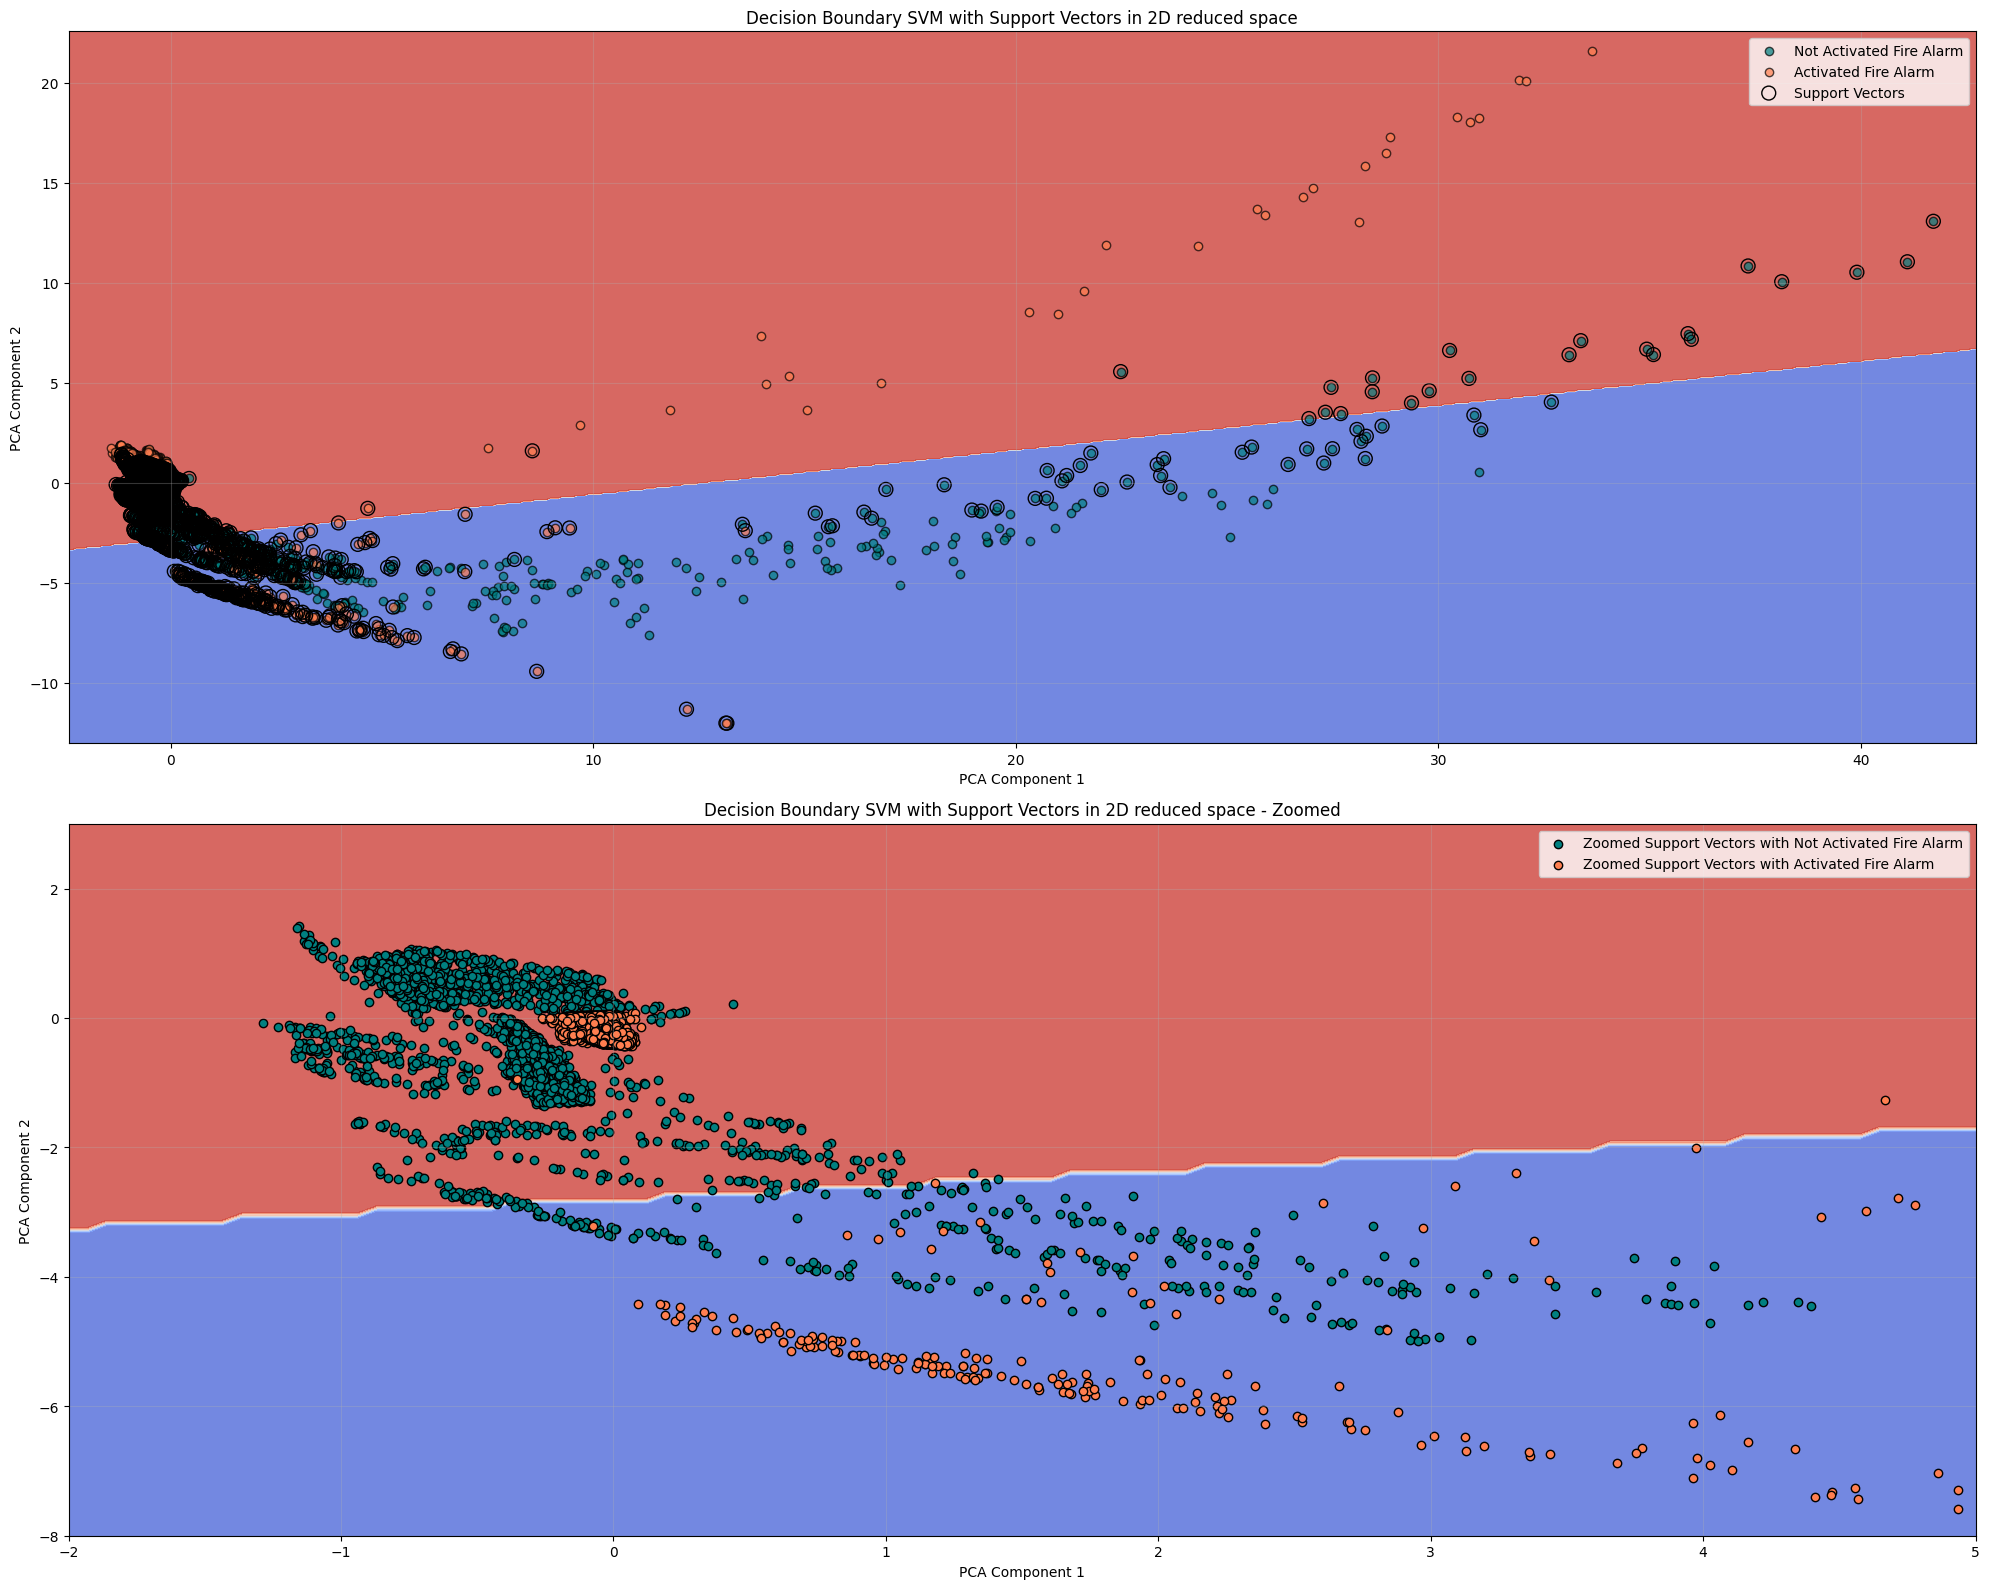

In [144]:
print_svm_model("linear")

### Polynomial Kernel

-- Standard Dimensions --
SVC_PolyKernel_12Features:
Training Ratio: 1.0 over Standard Training Set
Total Features: 12
Scaling: True
Accuracy: 91.12%
Training Time: 9.44 seconds
-- Dimensionality Reduction --
SVC_PolyKernel_2Features:
Training Ratio: 0.4 over Standard Training Set
Total Features: 2
Scaling: True
Accuracy: 72.71%
Training Time: 21.07 seconds


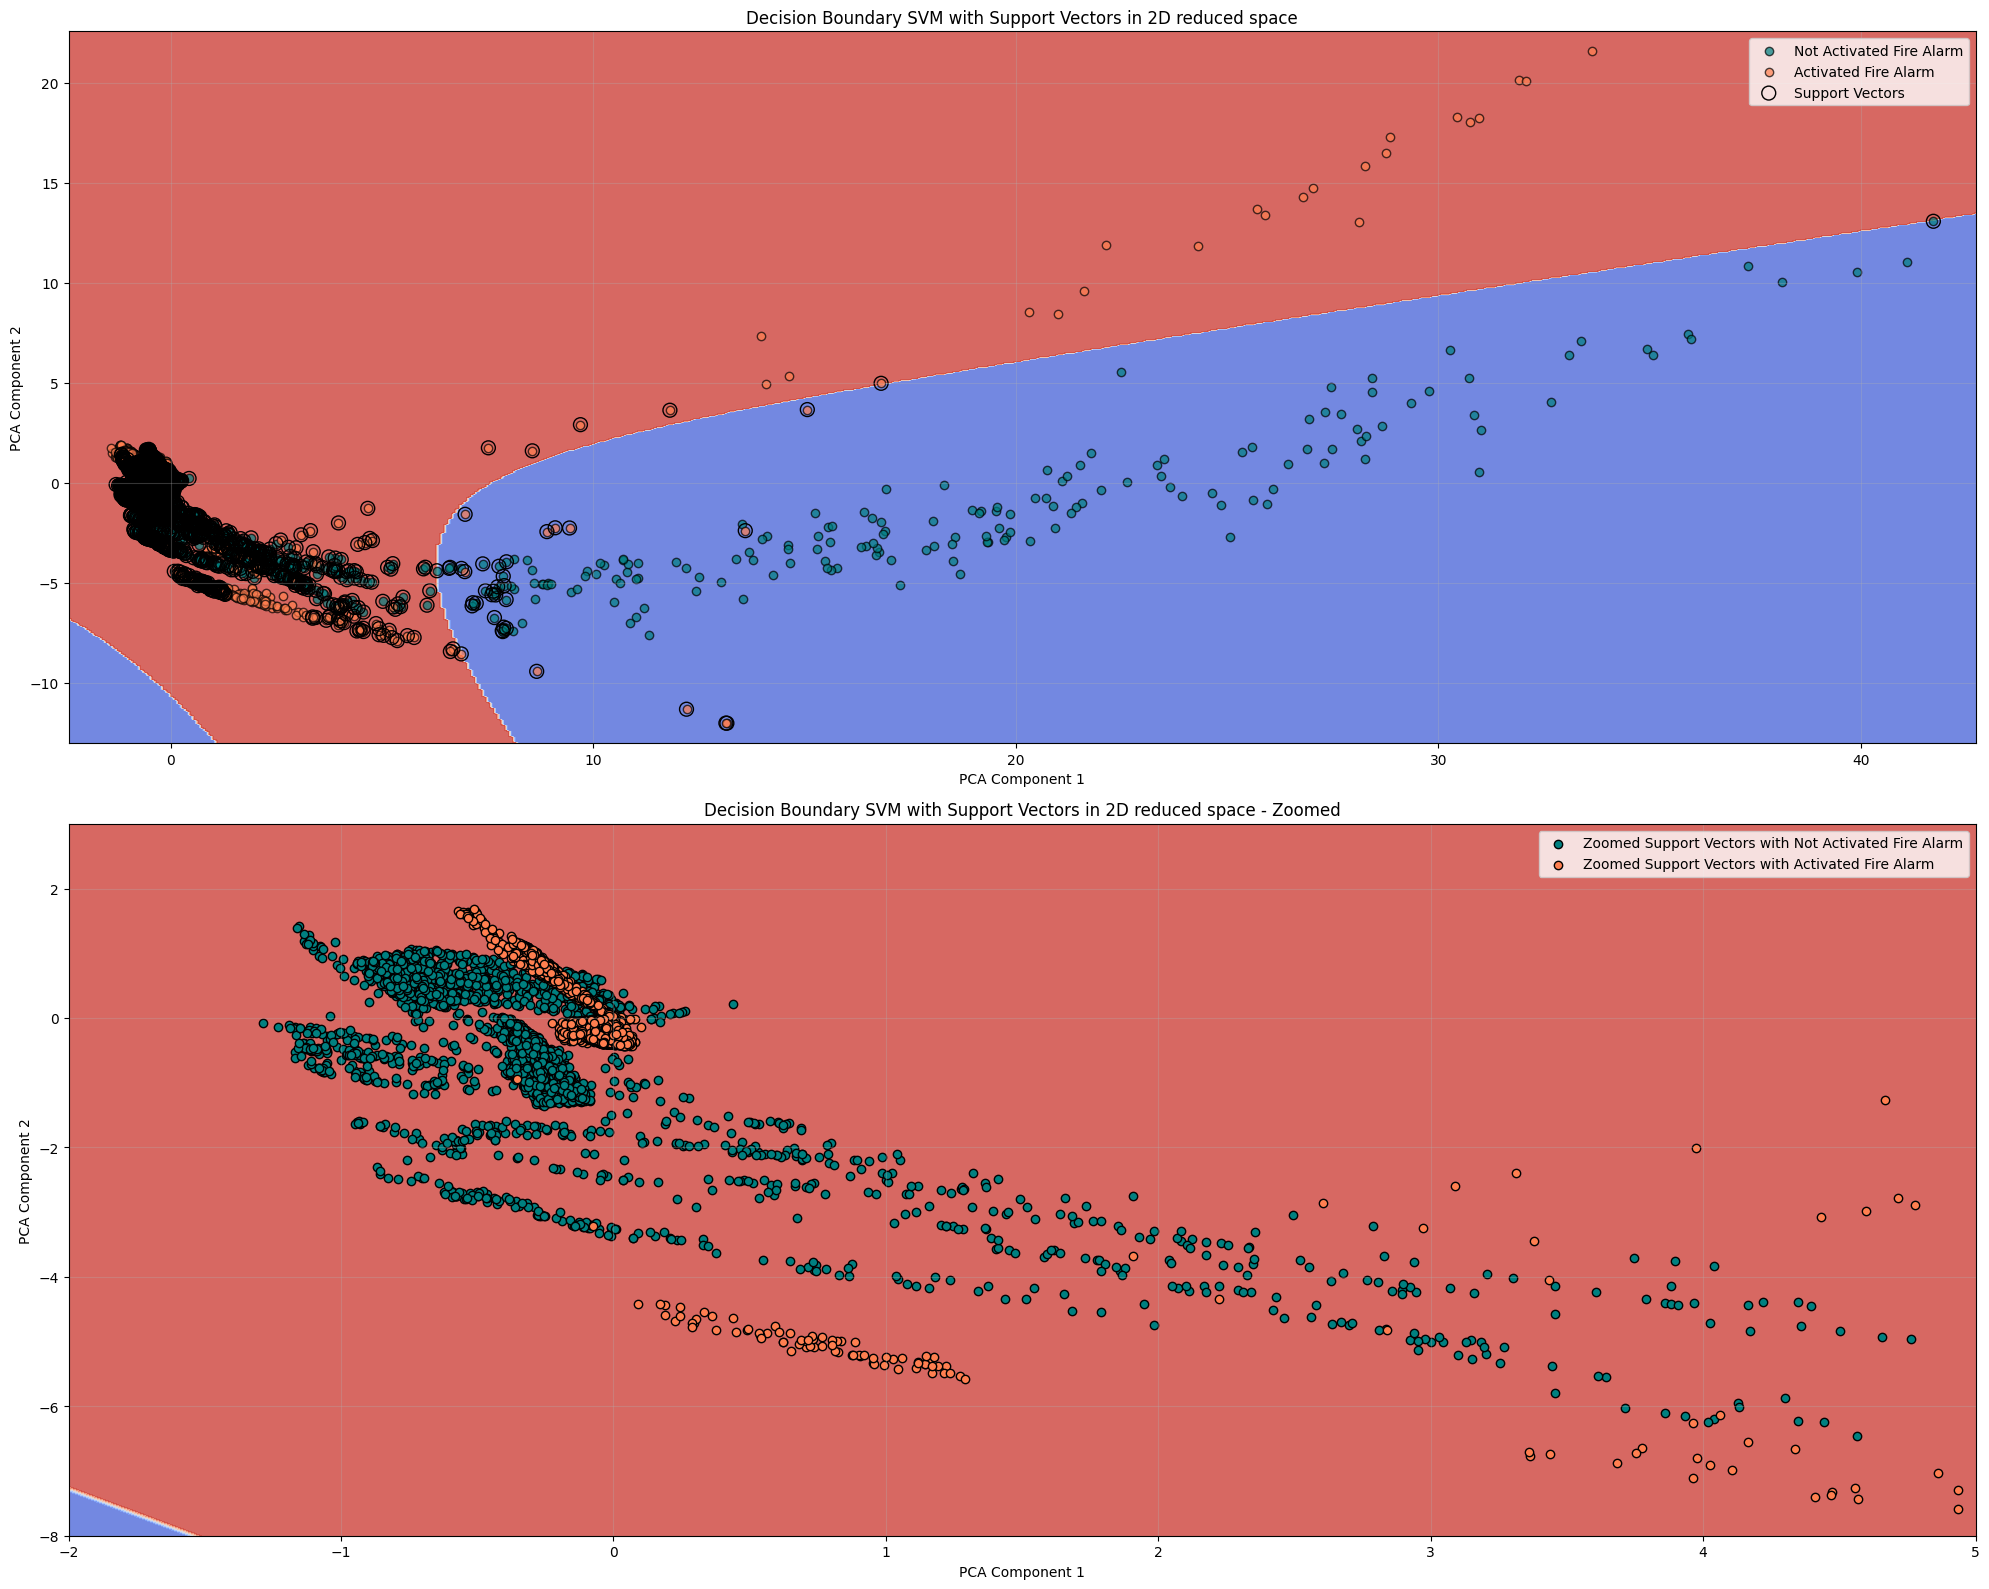

In [145]:
print_svm_model("poly")

### Radial Basis Kernel

-- Standard Dimensions --
SVC_RbfKernel_12Features:
Training Ratio: 1.0 over Standard Training Set
Total Features: 12
Scaling: True
Accuracy: 96.67%
Training Time: 5.74 seconds
-- Dimensionality Reduction --
SVC_RbfKernel_2Features:
Training Ratio: 0.4 over Standard Training Set
Total Features: 2
Scaling: True
Accuracy: 89.83%
Training Time: 1.50 seconds


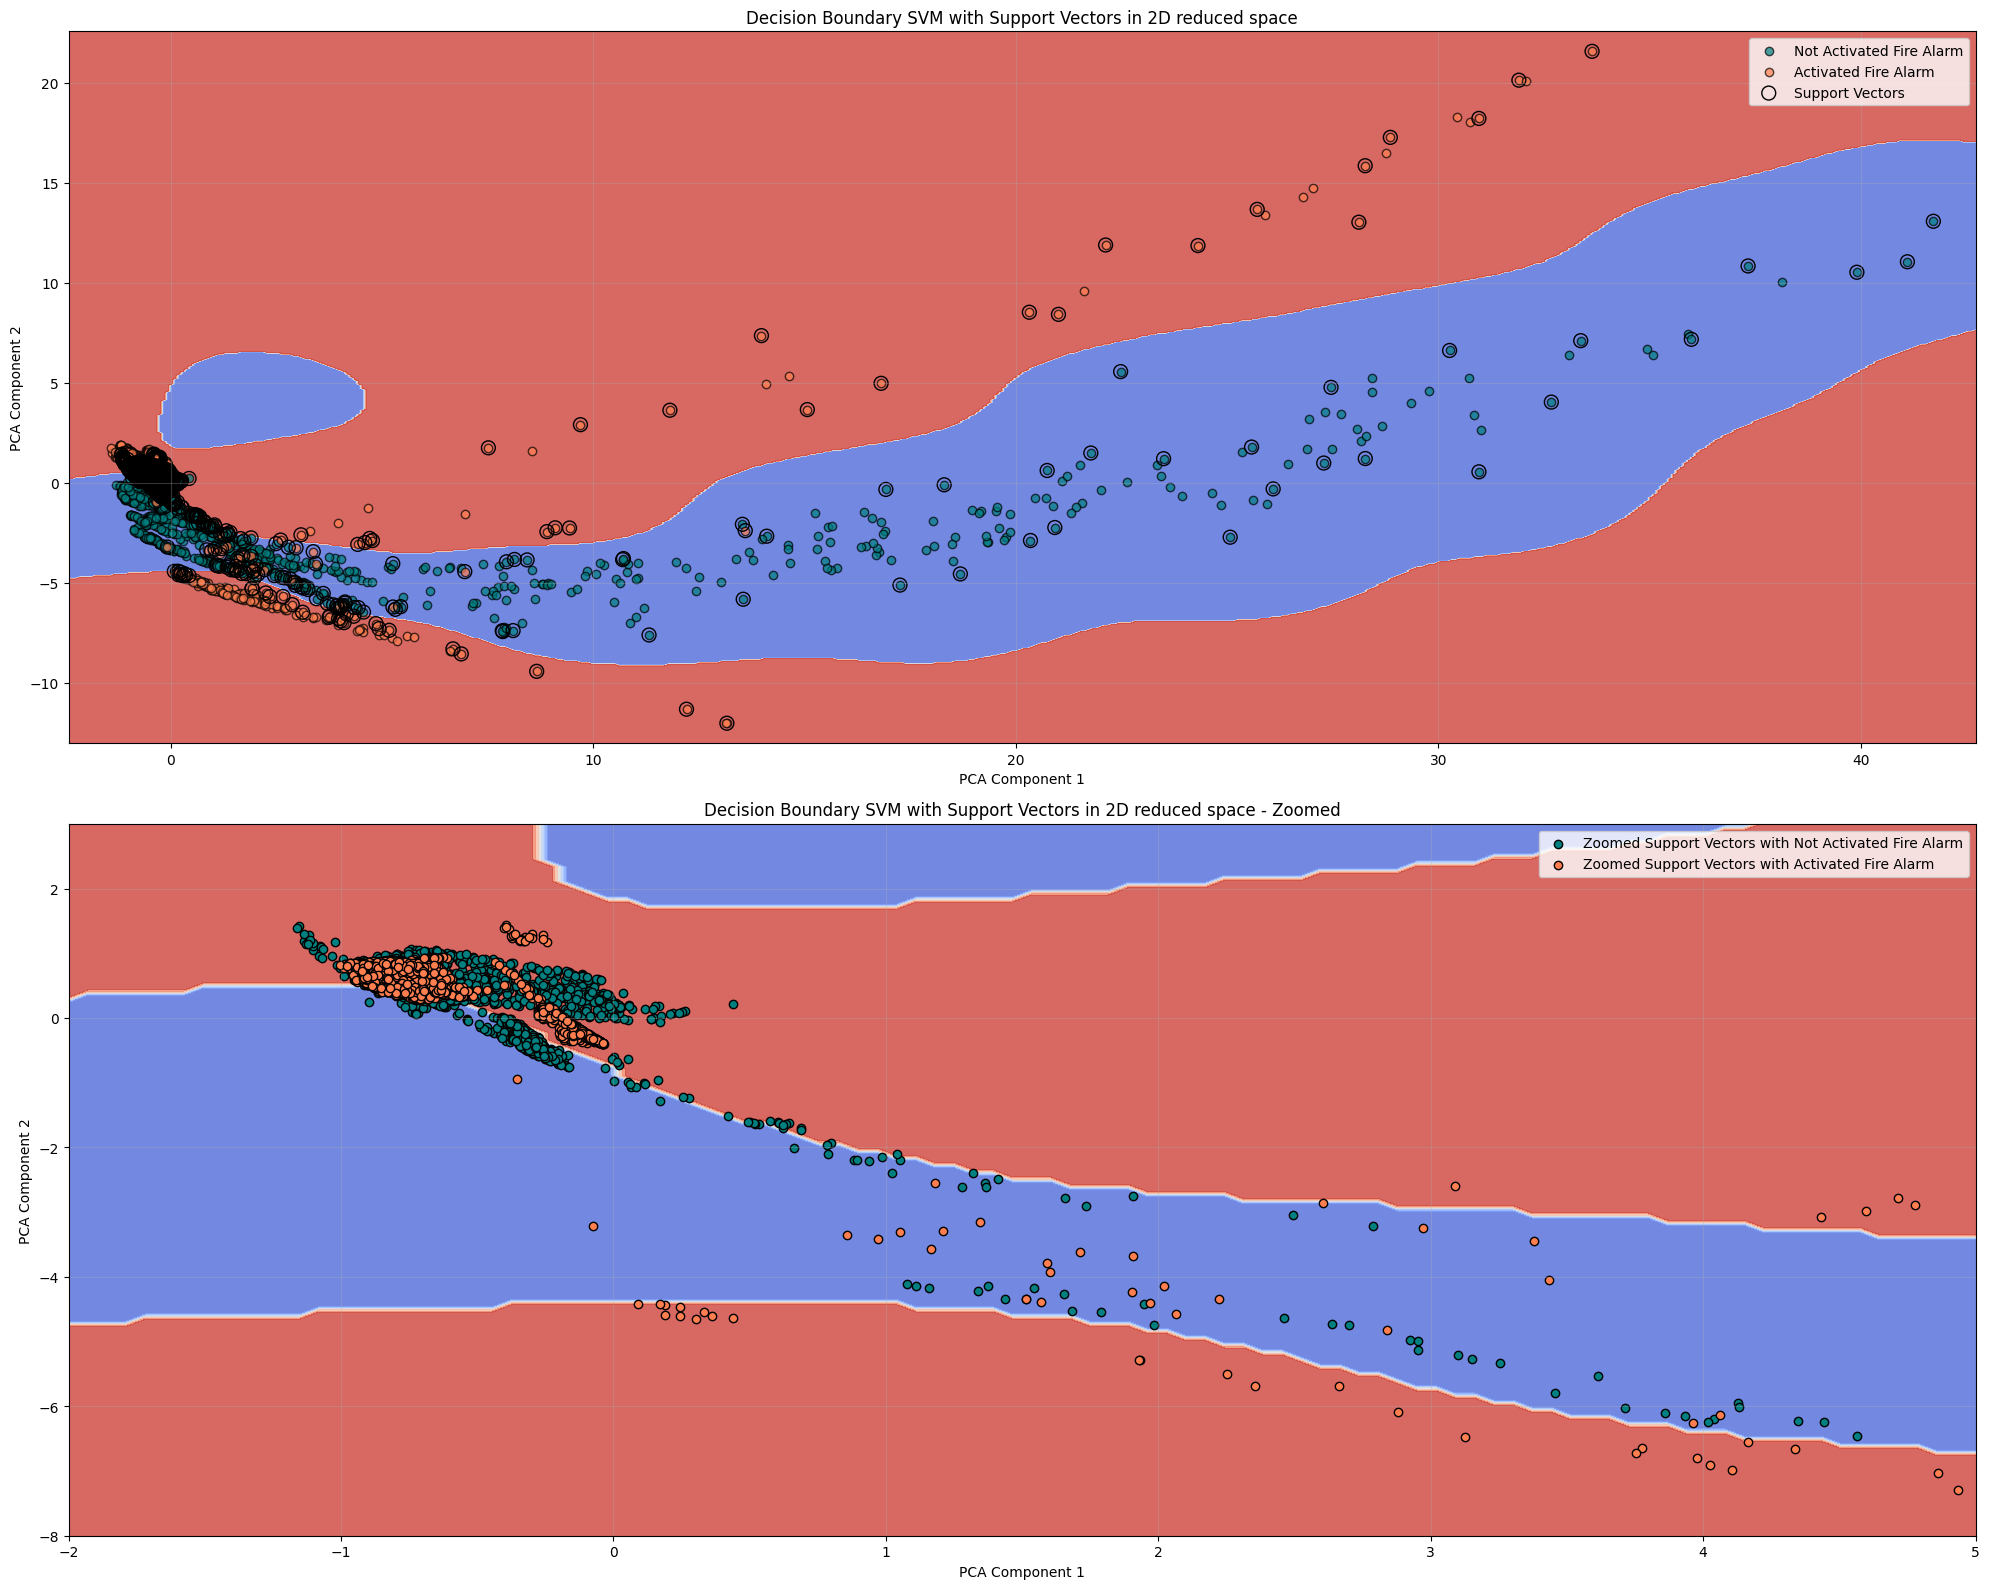

In [146]:
print_svm_model("rbf")

### Sigmoid Kernel

-- Standard Dimensions --
SVC_SigmoidKernel_12Features:
Training Ratio: 1.0 over Standard Training Set
Total Features: 12
Scaling: True
Accuracy: 68.87%
Training Time: 26.22 seconds
-- Dimensionality Reduction --
SVC_SigmoidKernel_2Features:
Training Ratio: 0.4 over Standard Training Set
Total Features: 2
Scaling: True
Accuracy: 61.72%
Training Time: 5.41 seconds


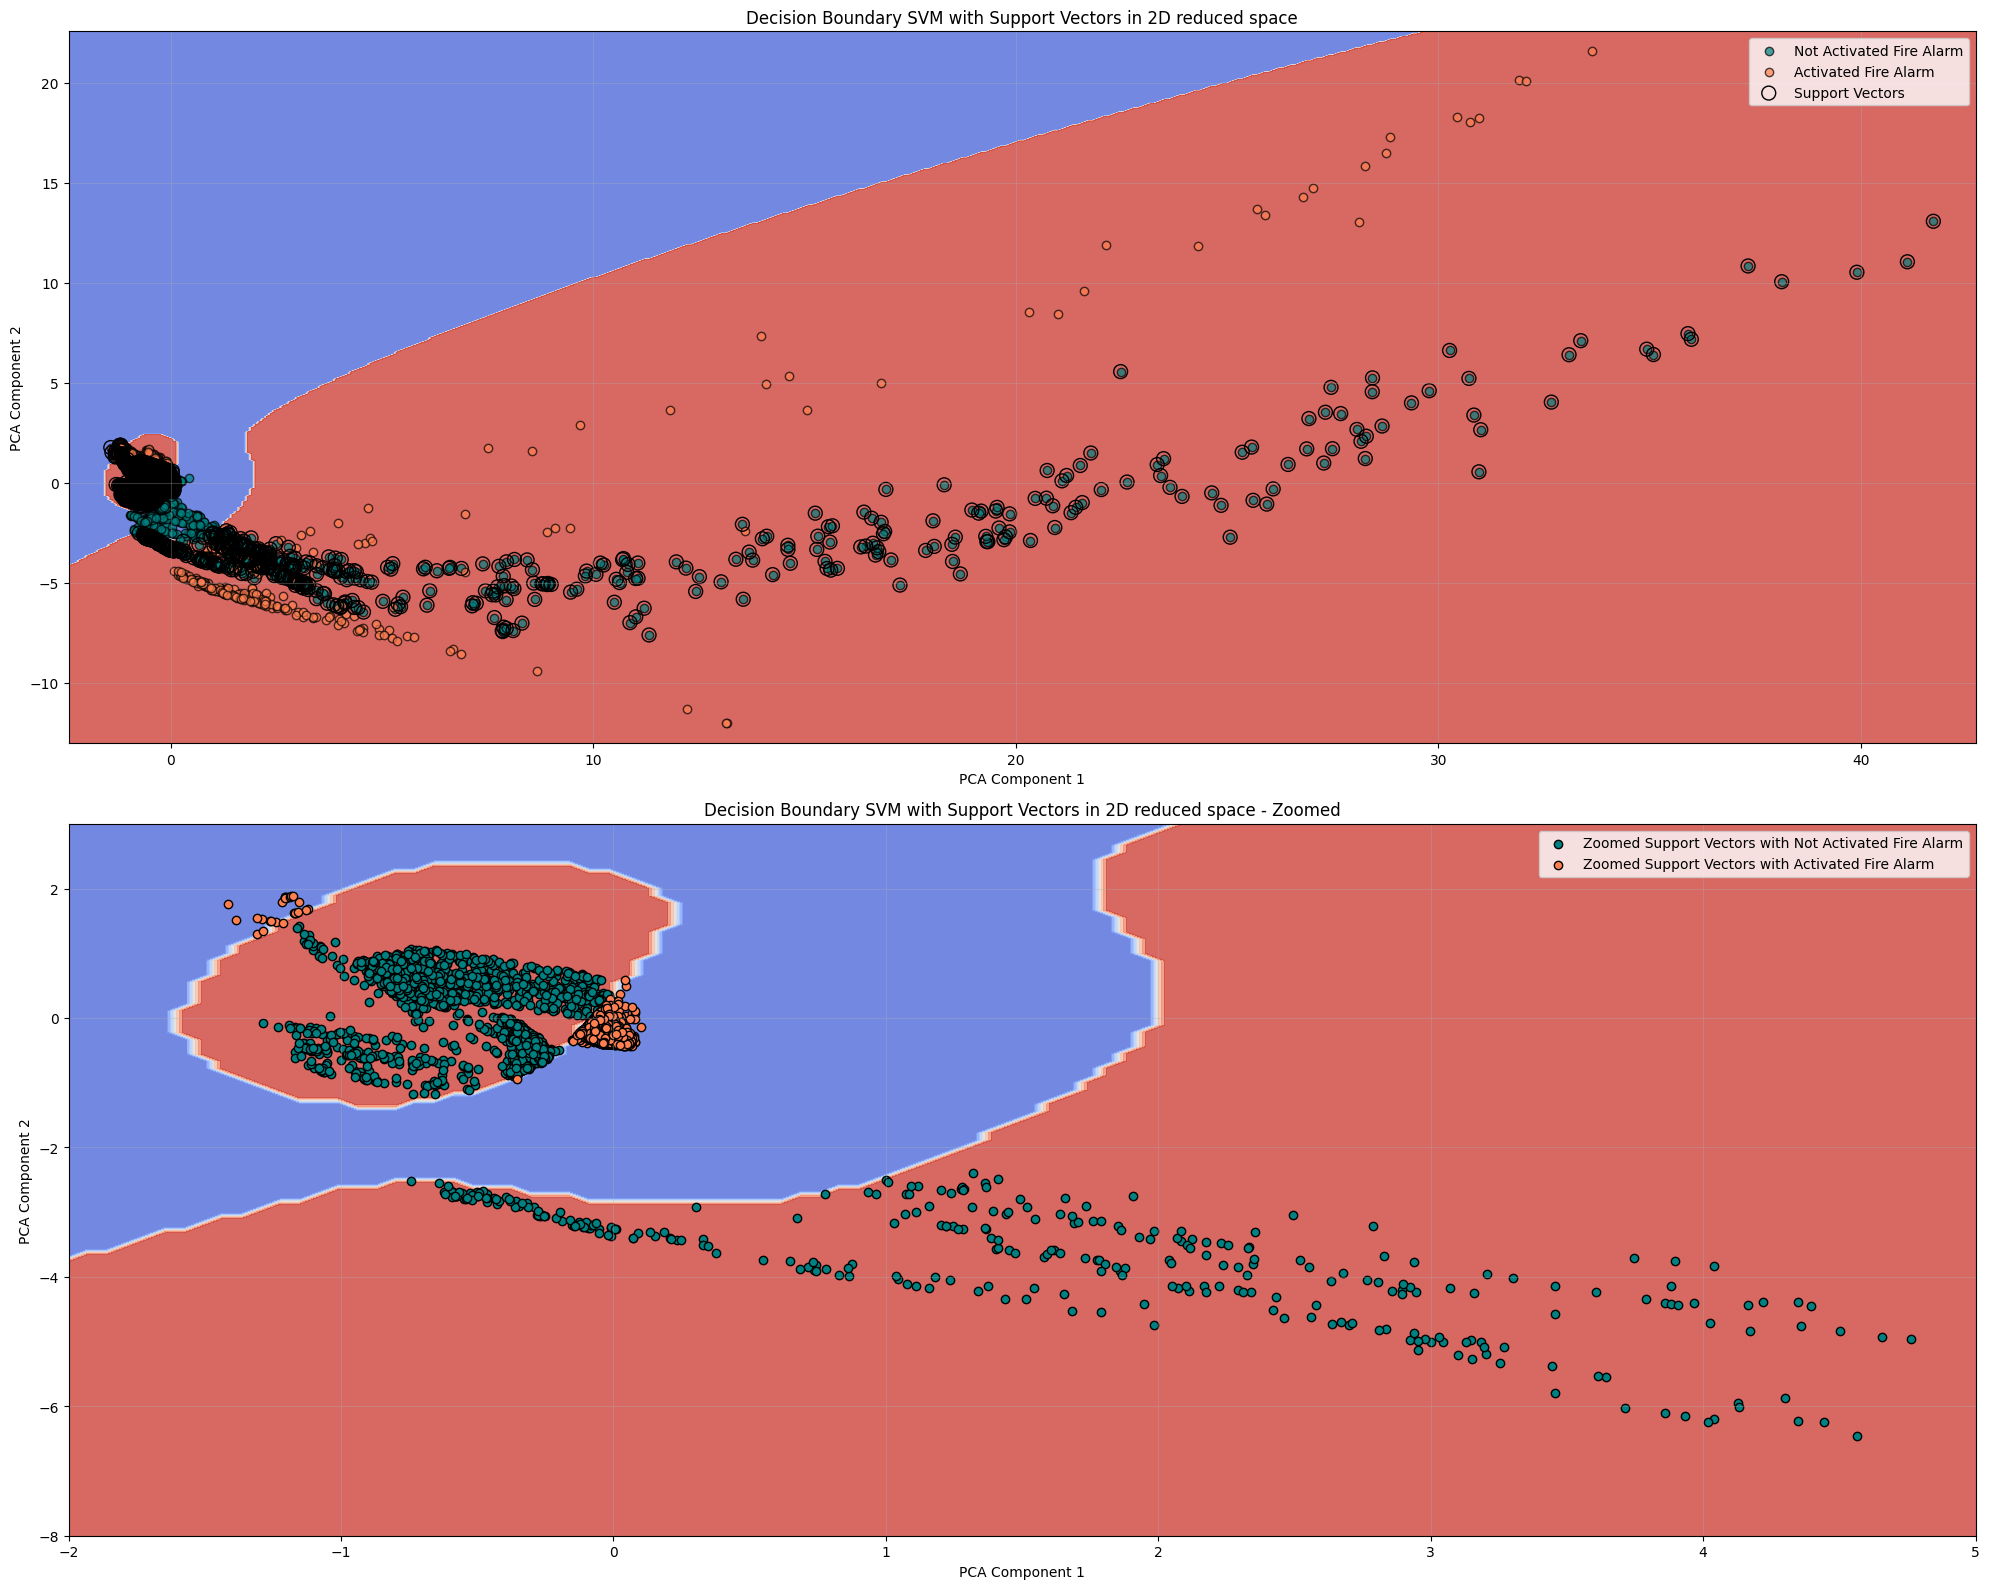

In [147]:
print_svm_model("sigmoid")